In [2]:
from manim import *

Manim Community v0.17.2

In [3]:
config.media_width = "100%"
config.verbosity = "WARNING"

In [27]:
%%manim -qm CircleToSquare

class CircleToSquare(Scene):
    def construct(self):
        blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        green_square = Square(color=GREEN, fill_opacity=0.8)
        self.play(Create(blue_circle))
        self.wait()
        
        self.play(Transform(blue_circle, green_square))
        self.wait()

In [7]:
%%manim -qm HelloCircle

class HelloCircle(Scene):
    def construct(self):
        # blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        # We can also create a "plain" circle and add the desired attributes via set methods:
        circle = Circle()
        blue_circle = circle.set_color(BLUE).set_opacity(0.5)
        
        label = Text("A wild circle appears!")
        label.next_to(blue_circle, DOWN, buff=0.5)
        
        self.play(Create(blue_circle), Write(label))
        self.wait()

In [8]:
%%manim -qm CircleAnnouncement

class CircleAnnouncement(Scene):
    def construct(self):
        blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        announcement = Text("Let us draw a circle.")
        
        self.play(Write(announcement))
        self.wait()
        
        self.play(announcement.animate.next_to(blue_circle, UP, buff=0.5))
        self.play(Create(blue_circle))

In [9]:
%%manim -qm AnimateSyntax

class AnimateSyntax(Scene):
    def construct(self):
        triangle = Triangle(color=RED, fill_opacity=1)
        self.play(DrawBorderThenFill(triangle))
        self.play(triangle.animate.shift(LEFT))
        self.play(triangle.animate.shift(RIGHT).scale(2))
        self.play(triangle.animate.rotate(PI/3))

In [10]:
%%manim -qm DifferentRotations

class DifferentRotations(Scene):
    def construct(self):
        left_square = Square(color=BLUE, fill_opacity=0.7).shift(2*LEFT)
        right_square = Square(color=GREEN, fill_opacity=0.7).shift(2*RIGHT)
        self.play(left_square.animate.rotate(PI), Rotate(right_square, angle=PI), run_time=2)
        self.wait()

In [11]:
%%manim -qm CauchyIntegralFormula

class CauchyIntegralFormula(Scene):
    def construct(self):
        formula = MathTex(r"[z^n]f(z) = \frac{1}{2\pi i}\oint_{\gamma} \frac{f(z)}{z^{n+1}}~dz")
        self.play(Write(formula), run_time=3)
        self.wait()

In [5]:
%%manim -qm PlotExample

class PlotExample(Scene):
    def construct(self):
        plot_axes = Axes(
            x_range=[0, 1, 0.05],
            y_range=[0, 1, 0.05],
            x_length=9,
            y_length=5.5,
            axis_config={
                "numbers_to_include": np.arange(0, 1 + 0.1, 0.1),
                "font_size": 24,
            },
            tips=False,
        )

        y_label = plot_axes.get_y_axis_label("y", edge=LEFT, direction=LEFT, buff=0.4)
        x_label = plot_axes.get_x_axis_label("x")
        plot_labels = VGroup(x_label, y_label)

        plots = VGroup()
        for n in np.arange(1, 20 + 0.5, 0.5):
            plots += plot_axes.plot(lambda x: x**n, color=WHITE)
            plots += plot_axes.plot(
                lambda x: x**(1 / n), color=WHITE, use_smoothing=False
            )

        extras = VGroup()
        extras += plot_axes.get_horizontal_line(plot_axes.c2p(1, 1, 0), color=BLUE)
        extras += plot_axes.get_vertical_line(plot_axes.c2p(1, 1, 0), color=BLUE)
        extras += Dot(point=plot_axes.c2p(1, 1, 0), color=YELLOW)
        title = Title(
            r"Graphs of $y=x^{\frac{1}{n}}$ and $y=x^n (n=1, 1.5, 2, 2.5, 3, \dots, 20)$",
            include_underline=False,
            font_size=40,
        )
        
        self.play(Write(title))
        self.play(Create(plot_axes), Create(plot_labels), Create(extras))
        self.play(AnimationGroup(*[Create(plot) for plot in plots], lag_ratio=0.05))

In [6]:
%%manim -qm ErdosRenyiGraph

import networkx as nx

nxgraph = nx.erdos_renyi_graph(14, 0.5)

class ErdosRenyiGraph(Scene):
    def construct(self):
        G = Graph.from_networkx(nxgraph, layout="spring", layout_scale=3.5)
        self.play(Create(G))
        self.play(*[G[v].animate.move_to(5*RIGHT*np.cos(ind/7 * PI) +
                                         3*UP*np.sin(ind/7 * PI))
                    for ind, v in enumerate(G.vertices)])
        self.play(Uncreate(G))

In [7]:
%%manim -qm OpeningManim

class OpeningManim(Scene):
    def construct(self):
        title = Tex(r"This is some \LaTeX")
        basel = MathTex(r"\sum_{n=1}^\infty \frac{1}{n^2} = \frac{\pi^2}{6}")
        VGroup(title, basel).arrange(DOWN)
        self.play(
            Write(title),
            FadeIn(basel, shift=UP),
        )
        self.wait()

        transform_title = Tex("That was a transform")
        transform_title.to_corner(UP + LEFT)
        self.play(
            Transform(title, transform_title),
            LaggedStart(*[FadeOut(obj, shift=DOWN) for obj in basel]),
        )
        self.wait()

        grid = NumberPlane(x_range=(-10, 10, 1), y_range=(-6.0, 6.0, 1))
        grid_title = Tex("This is a grid")
        grid_title.scale(1.5)
        grid_title.move_to(transform_title)

        self.add(grid, grid_title)
        self.play(
            FadeOut(title),
            FadeIn(grid_title, shift=DOWN),
            Create(grid, run_time=3, lag_ratio=0.1),
        )
        self.wait()

        grid_transform_title = Tex(
            r"That was a non-linear function \\ applied to the grid"
        )
        grid_transform_title.move_to(grid_title, UL)
        grid.prepare_for_nonlinear_transform()
        self.play(
            grid.animate.apply_function(
                lambda p: p + np.array([np.sin(p[1]), np.sin(p[0]), 0])
            ),
            run_time=3,
        )
        self.wait()
        self.play(Transform(grid_title, grid_transform_title))
        self.wait()

In [6]:
%%manim -qm GridExample

from manim import *

class GridExample(Scene):
    def construct(self):
        # Create a NumberPlane object with a grid
        grid = NumberPlane(
            x_range=(-2.5, 2.5), 
            y_range=(-2.5, 2.5),
            x_length=5,
            y_length=5,
            axis_config={
                "stroke_color": WHITE,
                "stroke_width": 2,
            },
            
        )
        
        # Create a 10x10 grid of squares
        squares = VGroup(*[
            Square(side_length=0.5)
            for i in range(100)
        ])
        squares.arrange_in_grid(10, 10, buff=0)
        
        
        # Color the squares as described
        for i in range(0,10):
            for j in range(i+1):
                index = i*10 + j
                squares[index].set_color(RED)
                squares[index].set_fill(opacity=0.5)
        squares.set_stroke(WHITE, width=4)
        self.play(Create(squares))
        # Add the grid and squares to the scene
        
        self.add(grid, squares)
        
        
        # Wait for a moment
        self.wait(5)
        


In [57]:
%%manim -qm SquareRotation

class SquareRotation(Scene):
    def construct(self):
        # Create a square
        square = Square(color=RED, fill_opacity=1)

        # Rotate the square four times by 90 degrees each time
        for i in range(4):
            self.play(Rotate(square, PI/2))
            self.wait(2)


In [8]:
%%manim -pql ArcShapeIris
from manim import *

class ArcShapeIris(Scene):
    def construct(self):
        colors = [DARK_BROWN, BLUE_E, BLUE_D, BLUE_A, TEAL_B, GREEN_B, YELLOW_B]
        radius = [1 + rad * 0.1 for rad in range(len(colors))]

        circles_group = VGroup()

        # zip(radius, color) makes the iterator [(radius[i], color[i]) for i in range(radius)]
        circles_group.add(*[Circle(radius=rad, stroke_width=10, color=col)
                            for rad, col in zip(radius, colors)])
        self.play(Create(circles_group), run_time = 5)

In [3]:
%%manim -pql SuccessionExample

class SuccessionExample(Scene):
    def construct(self):
        dot1 = Dot(point=LEFT * 2 + UP * 2, radius=0.16, color=BLUE)
        dot2 = Dot(point=LEFT * 2 + DOWN * 2, radius=0.16, color=MAROON)
        dot3 = Dot(point=RIGHT * 2 + DOWN * 2, radius=0.16, color=GREEN)
        dot4 = Dot(point=RIGHT * 2 + UP * 2, radius=0.16, color=YELLOW)
        self.add(dot1, dot2, dot3, dot4)

        self.play(Succession(
            dot1.animate.move_to(dot2),
            dot2.animate.move_to(dot3),
            dot3.animate.move_to(dot4),
            dot4.animate.move_to(dot1)
        ))

In [24]:
%%manim -pql PolygonRectangle
from manim import *

class PolygonRectangle(Scene):
    def construct(self):
        # Draw regular polygon with 10 sides
        polygon = RegularPolygon(n=10, color=YELLOW)
        self.play(Create(polygon))

        # Form rectangle with polygon
        rect = Rectangle(height=polygon.get_height(), width=polygon.get_width(), color=BLUE)

        # Draw dotted lines from opposite vertices
        dots = []
        for i in range(0, 5):
            dot1 = Dot(polygon.get_vertices()[i], color=RED)
            dot2 = Dot(polygon.get_vertices()[i+5], color=RED)
            line = DashedLine(dot1.get_center(), dot2.get_center(), color=RED)
            self.play(Create(dot1), Create(dot2), Create(line))
            dots.append(dot1)
            dots.append(dot2)
            dots.append(line)
        self.wait()


<string>:10: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.


In [36]:
%%manim -pql TriangleAndSquares
from manim import *

class TriangleAndSquares(Scene):
    def construct(self):
        # Create a 3-4-5 triangle
        triangle = Polygon(ORIGIN, 4*RIGHT, 3*UP, fill_color=RED,fill_opacity=0.5, stroke_width=2, stroke_color=WHITE).scale(0.5)
        
        # Position it for the visual
        triangle.shift(1.5*LEFT+DOWN)
        
        # Create the corresponding squares at each of triangle's sides
        square1 = Square(side_length=1.5, fill_color=PURPLE, fill_opacity=0.5).next_to(triangle, LEFT, buff=0)
        square2 = Square(side_length=2, fill_color=BLUE, fill_opacity=0.5).next_to(triangle, DOWN, buff=0)
        square3 = Square(side_length=2.5, fill_color=PINK, fill_opacity=0.5).next_to(triangle, ORIGIN, buff=0).rotate(-1229*PI/6000)
        square3.shift((2/3)*UP+(3/4)*RIGHT+0.34*UP)
        
        # Create a title
        title = Tex(" This is a 3-4-5 triangle ")
        
        #Animate and Add Objects to the scene
        self.play(Create(triangle))
        self.add(triangle)
        self.wait()
        self.play(Create(title.next_to(triangle, DOWN)))
        self.wait()
        self.play(FadeOut(title))
        self.wait()
        self.play(Create(square1))
        self.play(Create(square2))
        self.play(Create(square3))
        self.add(square1,square2,square3)
        
        # Label the sides of the squares
        label1 = Tex("3").next_to(square1, LEFT, buff=0.2)
        label2 = Tex("4").next_to(square2, DOWN, buff=0.2)
        label3 = Tex("5").next_to(square3, RIGHT, buff=0.2)
        
        # Show the labels one by one
        self.play(Create(label1))
        self.play(Create(label2))
        self.play(Create(label3))
        self.add(label1, label2, label3)
        
        # Label the triangles according to their areas (in the middle)
        square_label1 = MathTex(r"3^2").next_to(triangle, LEFT, buff=0.5)
        square_label2 = MathTex(r"4^2").next_to(triangle, DOWN, buff=0.7)
        square_label3 = MathTex(r"5^2").next_to(triangle, UP+0.03*RIGHT)
        self.play(FadeIn(square_label1, square_label2, square_label3))
        self.wait(3)



In [28]:
%%manim -pql TriangleScaling

class TriangleScaling(Scene):
    def construct(self):
        triangle = Triangle(fill_opacity = 0.5)
        triangle.save_state()
        
        scale_factor = ValueTracker(1)
        scale_value = Integer(scale_factor.get_value())
        scale_value.add_updater(
            lambda mob: mob.next_to(triangle,RIGHT, buff = 2)
            )

        def update_triangle(mob):
            mob.scale(scale_factor.get_value())

        
        def update_value(obj):
            obj.scale(scale_factor.get_value())

        scale_value.add_updater(update_value)
        triangle.add_updater(update_triangle)

        self.play(FadeIn(triangle, scale_value))
        self.play(triangle.animate.set_color(PURPLE).set_opacity(0.5).scale(0), scale_value.animate.set_value(0), run_time =3)
        self.play(Restore(triangle), scale_value.animate.set_value(1), run_time = 3, )
        self.play(triangle.animate.scale(3),scale_value.animate.set_value(3), run_time = 6)
        self.wait()
        self.play(Restore(triangle), scale_value.animate.set_value(1), run_time = 3)

In [32]:
%%manim -pql TriangleScaling
config.background_color = BLACK
class TriangleScaling(Scene):
    def construct(self):

        #Create a title
        
        title = Tex("Let's Scale a Triangle")
        
        #Create the triangle
        triangle = Triangle().set_stroke(PURPLE).set_color(PURPLE).set_opacity(0.5)
        triangle.save_state()
        
        #Create the scale value
        scale_factor = ValueTracker(1)
        scale_value = Integer(scale_factor.get_value())
        scale_value.add_updater(
            lambda mob: mob.next_to(triangle,RIGHT, buff = 2)
            )
        
        #Add everything to the canvas and animate
        
        self.play(FadeIn(title))
        self.wait(3)
        self.play(FadeOut(title))
        self.wait()
        self.play(FadeIn(triangle, scale_value))
        triangle.generate_target()
        triangle.target.scale(0)
        self.add(triangle)
        self.wait()
        self.play(MoveToTarget(triangle), scale_value.animate.set_value(0), run_time = 3)
        self.play(Restore(triangle), scale_value.animate.set_value(1), run_time = 3)
        self.wait()
        self.play(triangle.animate.scale(3), scale_value.animate.set_value(3), run_time = 4)
        self.wait()
        self.play(Restore(triangle),scale_value.animate.set_value(1), run_time = 3)
        self.wait()

In [53]:
%%manim -pql SineWave
config.background_color = BLACK
from manim import *

class SineWave(Scene):
    def construct(self):
        ax = Axes(x_range=[-8,8,3.15], y_range=[-2,2]).set_color(BLUE)
        curve = ax.plot(lambda x: np.sin(x), color=RED)
        area = ax.get_area(curve, x_range=[-2*np.pi, 2*np.pi], color = BLUE)
        self.play(FadeIn(ax))
        self.wait()
        self.play(Create(curve), run_time = 3)
        self.play(FadeIn(area))
        

In [29]:
%%manim -pql SineWave
config.background_color = BLACK
from manim import *

class SineWave(Scene):
    def construct(self):
        ax = Axes(x_range=[-8,8,3.15], y_range=[-2,2]).set_color(BLUE)
        curve = ax.plot(lambda x: np.sin(x), color=RED)
        area = ax.get_area(curve, x_range=[-2*np.pi, 2*np.pi], color = BLUE)
        self.play(FadeIn(ax))
        self.wait()
        self.play(Create(curve), run_time = 3)
        self.play(FadeIn(area))
        
        position = ValueTracker(0)
        pointer = Vector(DOWN)
        pointer.add_updater(
            lambda mob: mob.next_to(
                ax.coords_to_point(position.get_value()), UP
            )
        )
        pointer.update()
        self.add(pointer)
        self.wait()
        self.play(position.animate.set_value(-6.26), run_time = 2)
        self.play(position.animate.set_value(6.26), run_time = 4)
        self.wait(2)

In [2]:
%%manim -pql SineWave
config.background_color = WHITE
from manim import *

class SineWave(Scene):
    def construct(self):
        
        # Create a title
        title = MathTex(r"\text{This is a Sine Wave ranging from } -2\pi \text{ to } 2\pi").set_color(BLACK)
        
        
        # Create the x-axis and y-axis
        ax = Axes(x_range=[-8,8,3.15], y_range=[-2,2]).set_color(BLACK)
        
        #Create the sine wave
        curve = ax.plot(lambda x: np.sin(x), color=BLACK)
        
        #Get the area in the range [-2pi to 2pi]
        area = ax.get_area(curve, x_range=[-2*np.pi, 2*np.pi], color = BLUE)
        
        # Animate
        self.play(FadeIn(ax))
        self.wait()
        self.play(Create(curve), run_time = 3)
        self.play(FadeIn(area))
        self.wait()
        self.play(Create(title.next_to(ax, UP)))
        self.add(title.next_to(ax, UP))

        # Create the value above the range of x
        a= ValueTracker(0)
        
        
        # Create the position of the arrow
        position = ValueTracker(0)
        
        # Create the arrow
        pointer = Vector(DOWN).set_color(RED)
        
        # Add updater in the arrow
        pointer.add_updater(
            lambda mob: mob.next_to(
                ax.coords_to_point(position.get_value()), UP
            )
        )
        
        # Create the label for the x-range
        a_number = DecimalNumber(
            a.get_value(),
            color = RED,
            num_decimal_places = 3,
            show_ellipsis = True
        )
        
        # Add updater for the label over the x-range
        a_number.add_updater(
            lambda mob: mob.set_value(a.get_value()).next_to(pointer, UP)
        )
        
        # Animate
        
        self.play(FadeIn(pointer, a_number))
        self.wait()
        self.play(position.animate.set_value(-6.26), a.animate.set_value(-2), run_time = 2)
        self.wait()
        self.play(position.animate.set_value(6.26), a.animate.set_value(2), run_time = 4)
        self.wait(2)

[04/09/23 06:20:25] INFO     Animation 0 : Using cached data (hash :                           ]8;id=862793;file://C:\Users\payal\anaconda3\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=76696;file://C:\Users\payal\anaconda3\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             2578476628_4150355572_223132457)                                                      

                    INFO     Animation 1 : Using cached data (hash :                           ]8;id=115781;file://C:\Users\payal\anaconda3\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=724801;file://C:\Users\payal\anaconda3\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             2535676517_329969645_2789323738)                                                      

                    INFO     Animation 2 : Using cached data (hash :                           ]8;id=462398;file://C:\Users\payal\anaconda3\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=245024;file://C:\Users\payal\anaconda3\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             2535676517_2694628489_1852535596)                                                     

                    INFO     Animation 3 : Using cached data (hash :                           ]8;id=107812;file://C:\Users\payal\anaconda3\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=766885;file://C:\Users\payal\anaconda3\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             2535676517_983973377_463163123)                                                       

                    INFO     Animation 4 : Using cached data (hash :                           ]8;id=450016;file://C:\Users\payal\anaconda3\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=291970;file://C:\Users\payal\anaconda3\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             2535676517_329969645_1592352341)                                                      

                    INFO     Animation 5 : Partial movie file written in                   ]8;id=876570;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=479947;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\payal\media\videos\payal\480p15\partial_movie_files                         
                             \SineWave\2535676517_2099004507_2977345074.mp4'                                       

[04/09/23 06:20:27] INFO     Animation 6 : Partial movie file written in                   ]8;id=535616;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=797380;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\payal\media\videos\payal\480p15\partial_movie_files                         
                             \SineWave\2535676517_3779868516_3563366946.mp4'                                       

                    INFO     Animation 7 : Partial movie file written in                   ]8;id=476988;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=69545;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\payal\media\videos\payal\480p15\partial_movie_files                         
                             \SineWave\2535676517_3315967912_1794472084.mp4'                                       

[04/09/23 06:20:28] INFO     Animation 8 : Partial movie file written in                   ]8;id=72936;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=830297;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\payal\media\videos\payal\480p15\partial_movie_files                         
                             \SineWave\2535676517_1679405981_2202819057.mp4'                                       

[04/09/23 06:20:29] INFO     Animation 9 : Partial movie file written in                   ]8;id=975002;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=630329;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\payal\media\videos\payal\480p15\partial_movie_files                         
                             \SineWave\2535676517_3315967912_1993429295.mp4'                                       

[04/09/23 06:20:31] INFO     Animation 10 : Partial movie file written in                  ]8;id=147026;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=283787;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\payal\media\videos\payal\480p15\partial_movie_files                         
                             \SineWave\2535676517_3172628502_4115448080.mp4'                                       

                    INFO     Animation 11 : Partial movie file written in                  ]8;id=341490;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=812970;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\payal\media\videos\payal\480p15\partial_movie_files                         
                             \SineWave\2535676517_190800790_1510748896.mp4'                                        

                    INFO     Combining to Movie file.                                      ]8;id=259490;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=823621;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=308590;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=242952;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\payal\media\videos\payal\480p15\SineWave.mp4'                               
                                                                                                                   

                    INFO     The partial movie directory is full (> 100 files). Therefore, ]8;id=711953;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=423415;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene_file_writer.py#708\708]8;;\
                             manim has removed the 7 oldest file(s). You can change this                           
                             behaviour by changing max_files_cached in config.                                     

                    INFO     Rendered SineWave                                                         ]8;id=997781;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=990483;file://C:\Users\payal\anaconda3\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 12 animations                                                                  

[04/09/23 06:20:32] INFO     Previewed File at:                                                     ]8;id=729080;file://C:\Users\payal\anaconda3\lib\site-packages\manim\utils\file_ops.py\file_ops.py]8;;\:]8;id=495046;file://C:\Users\payal\anaconda3\lib\site-packages\manim\utils\file_ops.py#227\227]8;;\
                             'C:\Users\payal\media\videos\payal\480p15\SineWave.mp4'                               

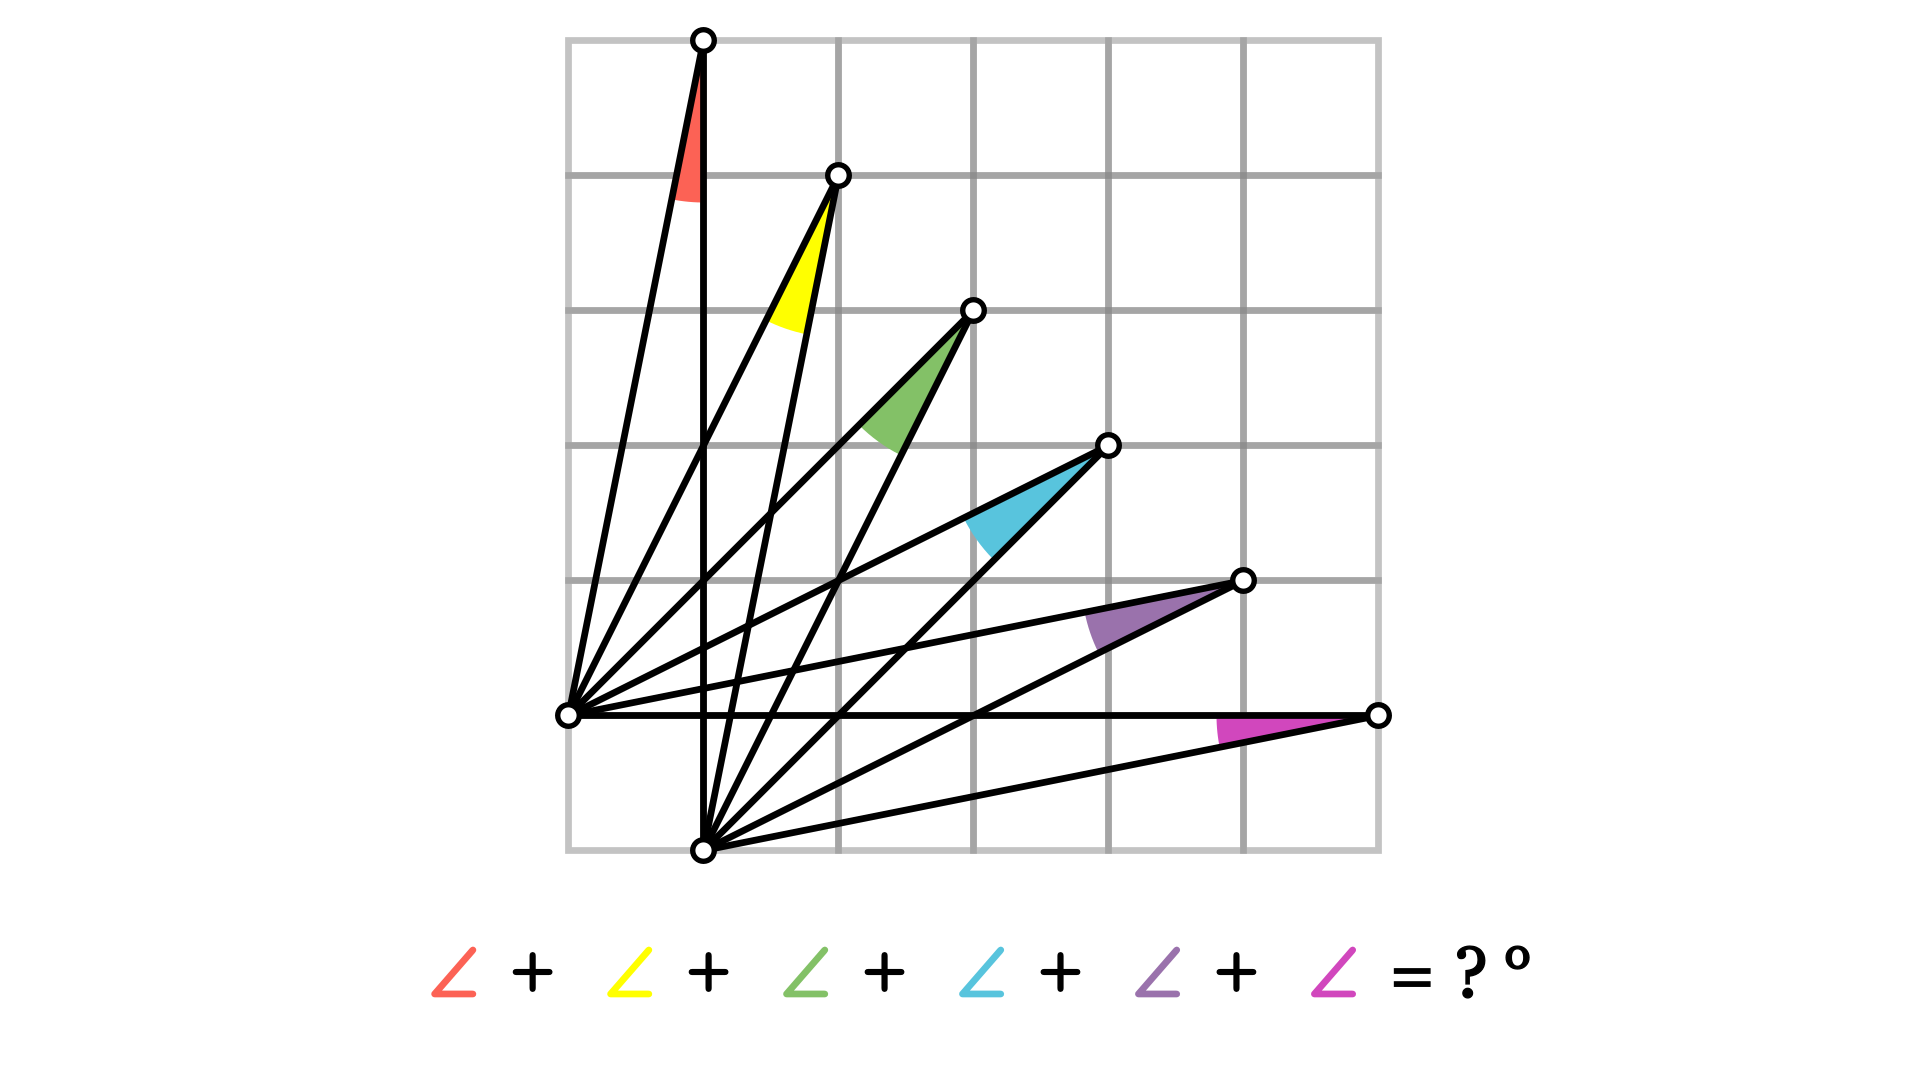

In [4]:
%%manim -pqh Grid
config.background_color = WHITE
from manim import *

class Grid(Scene):
    def construct(self):
        # Add grids
        rows = 6
        cols = 6
        grid = VGroup(*[
            VGroup(*[Square(side_length=1, fill_opacity=0, stroke_width=5, stroke_opacity = 0.5).move_to((i-rows//2)*RIGHT + (j-cols//2)*UP) for j in range(cols)]) for i in range(rows)
        ]).set_color(GREY).shift(0.6*RIGHT+1.2*UP)
        
        # Add lines
        line1 = Line(grid[0][5].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5)
        line2 = Line(grid[0][5].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5)
        line3 = Line(grid[1][4].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5)
        line4 = Line(grid[1][4].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5)
        line5 = Line(grid[2][3].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5)
        line6 = Line(grid[2][3].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5)
        line7 = Line(grid[3][2].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5)
        line8 = Line(grid[3][2].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5)
        line9 = Line(grid[4][1].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5)
        line10 = Line(grid[4][1].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5)
        line11 = Line(grid[5][0].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5)
        line12 = Line(grid[5][0].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5)
        
        # Add dots
        dot1 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line1.get_start())
        dot2 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line1.get_end())
        dot3 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line3.get_start())
        dot4 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line4.get_end())
        dot5 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line5.get_start())
        dot6 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line7.get_start())
        dot7 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line9.get_start())
        dot8 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line11.get_start())
        
        # Add sectors
        sector1 = Sector(arc_center=line2.get_start(), outer_radius=1.2, start_angle=line1.get_angle(), angle=PI/15, fill_opacity=1, fill_color=RED)
        sector2 = Sector(arc_center=line4.get_start(), outer_radius=1.2, start_angle=line3.get_angle(), angle=PI/12, fill_opacity=1, fill_color=YELLOW)
        sector3 = Sector(arc_center=line6.get_start(), outer_radius=1.2, start_angle=line5.get_angle(), angle=PI/10, fill_opacity=1, fill_color=GREEN)
        sector4 = Sector(arc_center=line8.get_start(), outer_radius=1.2, start_angle=line7.get_angle(), angle=PI/10, fill_opacity=1, fill_color=BLUE)
        sector5 = Sector(arc_center=line10.get_start(), outer_radius=1.2, start_angle=line9.get_angle(), angle=PI/12, fill_opacity=1, fill_color=PURPLE)
        sector6 = Sector(arc_center=line12.get_start(), outer_radius=1.2, start_angle=line11.get_angle(), angle=PI/15, fill_opacity=1, fill_color=PINK)
        
        # Add objects to the scene
        self.add(grid)
        self.add(sector1, sector2, sector3, sector4, sector5, sector6)
        self.add(line1, line2, line3, line4, line5, line6, line7, line8, line9, line10, line11, line12, dot1, dot2, dot3, dot4, dot5, dot6, dot7, dot8)
        
        # Create angle symbols
        angle_red = Tex("$\\angle$", color=RED).scale(1).set_stroke(width = 3)
        angle_yellow = Tex("$\\angle$", color=YELLOW).scale(1).set_stroke(width = 3)
        angle_green = Tex("$\\angle$", color=GREEN).scale(1).set_stroke(width = 3)
        angle_blue = Tex("$\\angle$", color=BLUE).scale(1).set_stroke(width = 3)
        angle_purple = Tex("$\\angle$", color=PURPLE).scale(1).set_stroke(width = 3)
        angle_pink = Tex("$\\angle$", color=PINK).scale(1).set_stroke(width = 3)

        # Position angle symbols
        angle_red.shift(3.2*DOWN+3.75*LEFT)
        angle_yellow.next_to(angle_red, RIGHT, buff=1)
        angle_green.next_to(angle_yellow, RIGHT, buff=1)
        angle_blue.next_to(angle_green, RIGHT, buff=1)
        angle_purple.next_to(angle_blue, RIGHT, buff=1)
        angle_pink.next_to(angle_purple, RIGHT, buff=1)

        # Create plus signs
        plus1 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus2 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus3 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus4 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus5 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)

        # Position plus signs
        plus1.next_to(angle_red, RIGHT, buff=0.3)
        plus2.next_to(angle_yellow, RIGHT, buff=0.3)
        plus3.next_to(angle_green, RIGHT, buff=0.3)
        plus4.next_to(angle_blue, RIGHT, buff=0.3)
        plus5.next_to(angle_purple, RIGHT, buff=0.3)
        
        # Add =?°
        symbol = Text(" = ? °").scale(0.8).set_color(BLACK).set_stroke(width = 1)
        symbol.next_to(angle_pink, RIGHT, buff=0.3)

        # Add objects to the scene
        self.add(symbol, angle_red, angle_yellow, angle_green, angle_blue, angle_purple, angle_pink, plus1, plus2, plus3, plus4, plus5)

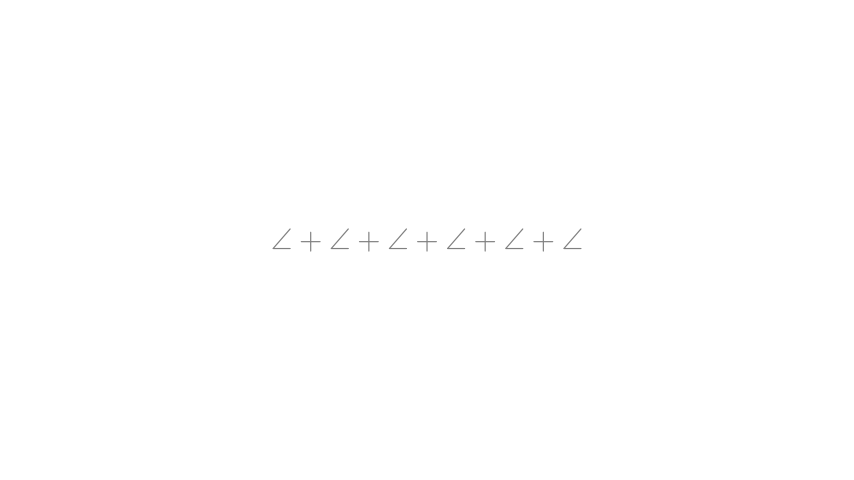

In [246]:
%%manim -pql AngleSymbolExample

class AngleSymbolExample(Scene):
    def construct(self):
        angle_symbol = MathTex("\\angle + \\angle + \\angle + \\angle + \\angle + \\angle").set_color(BLACK).set_sheen(5, ORIGIN)
        self.add(angle_symbol)


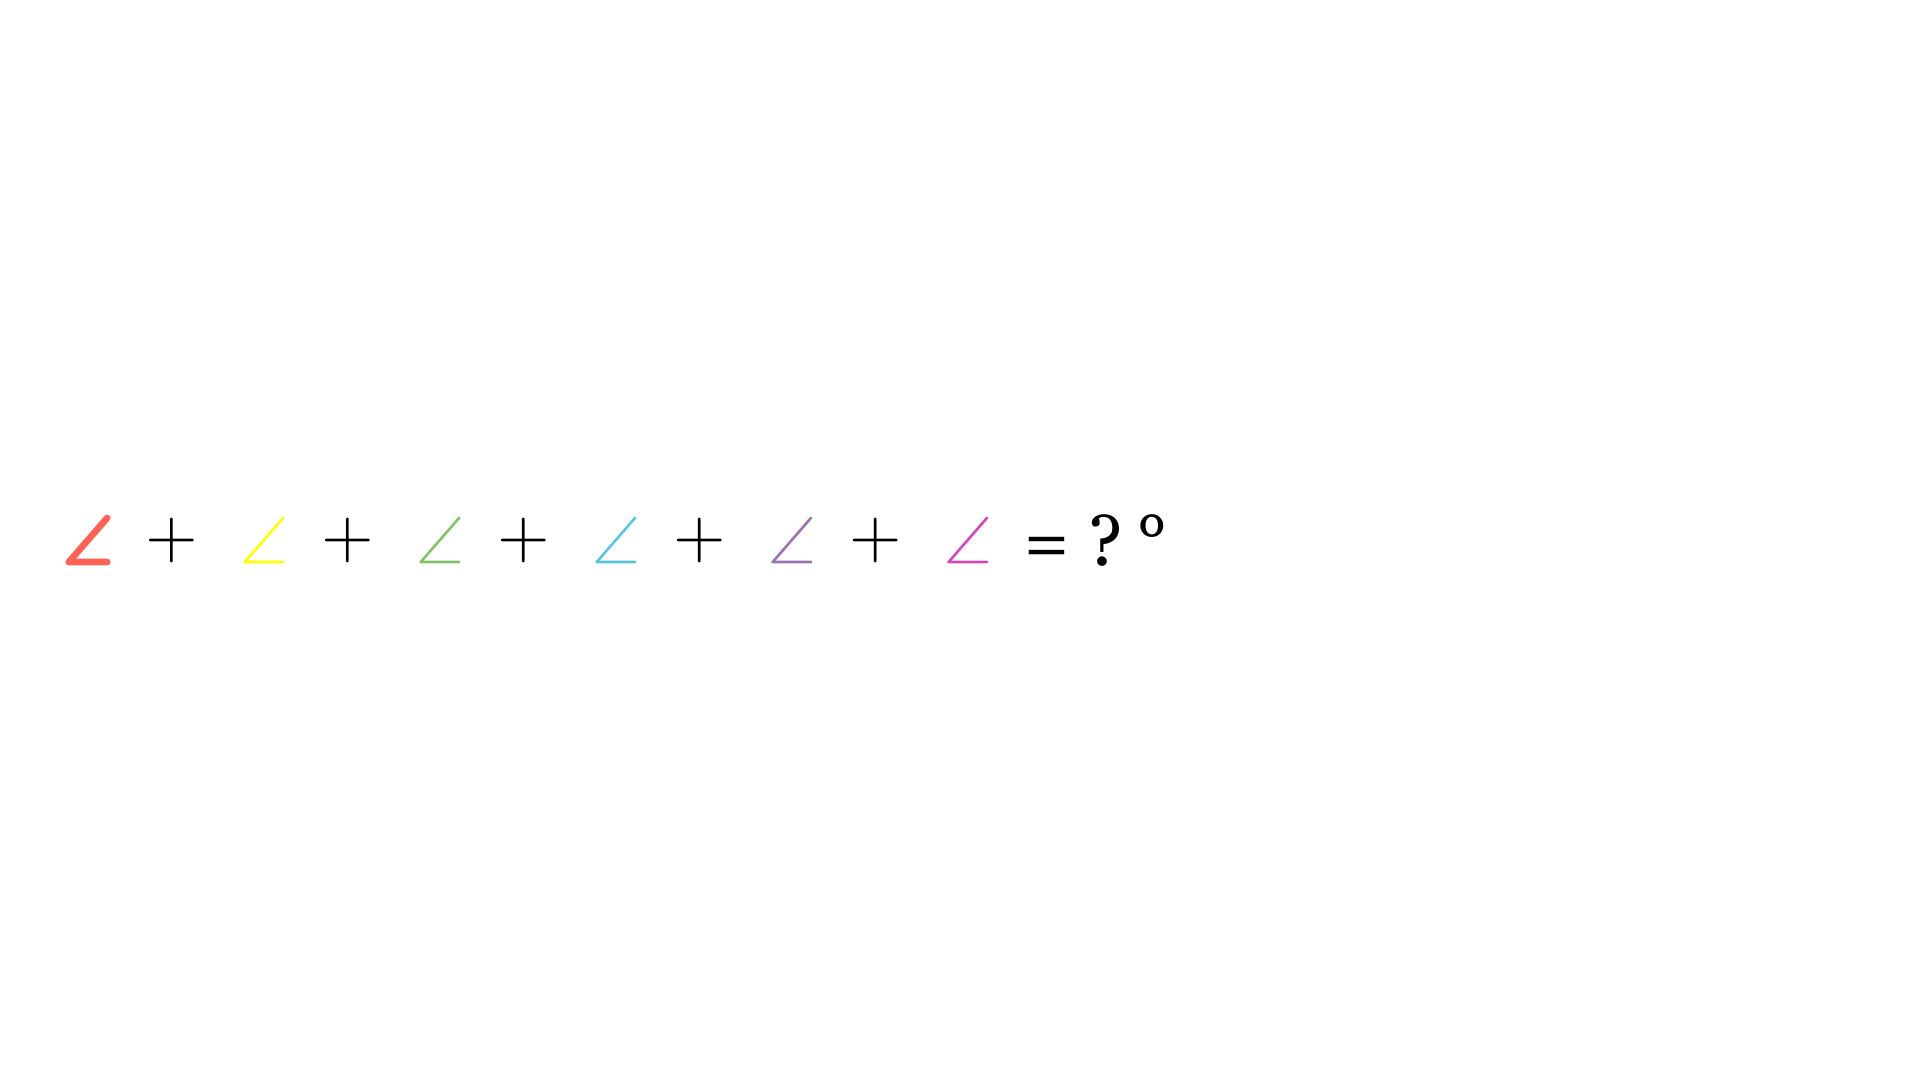

In [247]:
%%manim -pqh AngleSymbols
from manim import *

class AngleSymbols(Scene):
    def construct(self):

        # Create angle symbols
        angle_red = Tex("$\\angle$", color=RED).scale(1)
        angle_yellow = Tex("$\\angle$", color=YELLOW).scale(1)
        angle_green = Tex("$\\angle$", color=GREEN).scale(1)
        angle_blue = Tex("$\\angle$", color=BLUE).scale(1)
        angle_purple = Tex("$\\angle$", color=PURPLE).scale(1)
        angle_pink = Tex("$\\angle$", color=PINK).scale(1)

        # Position angle symbols
        angle_red.to_edge(LEFT)
        angle_yellow.next_to(angle_red, RIGHT, buff=1)
        angle_green.next_to(angle_yellow, RIGHT, buff=1)
        angle_blue.next_to(angle_green, RIGHT, buff=1)
        angle_purple.next_to(angle_blue, RIGHT, buff=1)
        angle_pink.next_to(angle_purple, RIGHT, buff=1)

        # Create plus signs
        plus1 = Tex("+", color=BLACK).scale(1)
        plus2 = Tex("+", color=BLACK).scale(1)
        plus3 = Tex("+", color=BLACK).scale(1)
        plus4 = Tex("+", color=BLACK).scale(1)
        plus5 = Tex("+", color=BLACK).scale(1)

        # Position plus signs
        plus1.next_to(angle_red, RIGHT, buff=0.3)
        plus2.next_to(angle_yellow, RIGHT, buff=0.3)
        plus3.next_to(angle_green, RIGHT, buff=0.3)
        plus4.next_to(angle_blue, RIGHT, buff=0.3)
        plus5.next_to(angle_purple, RIGHT, buff=0.3)
        
        #Add =?°
        symbol = Text(" = ? °").scale(0.8).set_color(BLACK)
        symbol.next_to(angle_pink, RIGHT, buff=0.3)
        
        # Add objects to the scene
        self.add(symbol, angle_red, angle_yellow, angle_green, angle_blue, angle_purple, angle_pink, plus1, plus2, plus3, plus4, plus5)


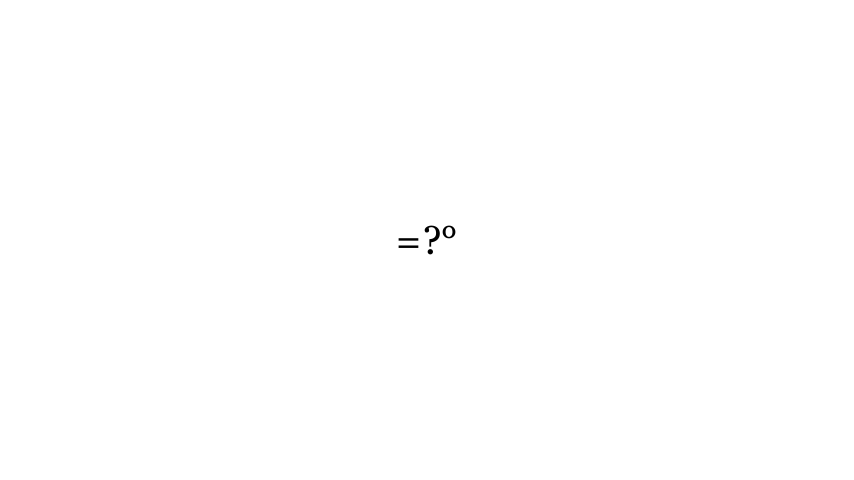

In [235]:
%%manim -pql ExampleScene
from manim import *

class ExampleScene(Scene):
    def construct(self):
        degree_symbol = Text("=?°").scale(1).set_color(BLACK)
        self.add(degree_symbol)


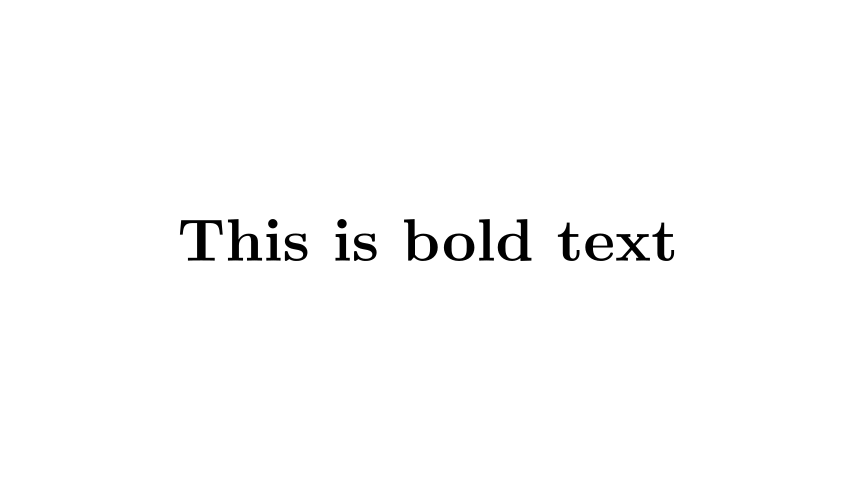

In [238]:
%%manim -pql BoldText
from manim import *

class BoldText(Scene):
    def construct(self):
        text = Tex("\\textbf{This is bold text}").scale(2).set_color(BLACK)
        self.add(text)


In [276]:
%%manim -pql AngleBetweenLines
from manim import *

class AngleBetweenLines(Scene):
    def construct(self):
        # Create grid and lines
        rows = 6
        cols = 6
        grid = VGroup(*[
            VGroup(*[Square(side_length=1, fill_opacity=0, stroke_width=5, stroke_opacity = 0.5).move_to((i-rows//2)*RIGHT + (j-cols//2)*UP) for j in range(cols)]) for i in range(rows)
        ]).set_color(GREY).shift(0.6*RIGHT+1.2*UP)
        line1 = Line(grid[0][5].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5)
        line2 = Line(grid[0][5].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5)
        self.add(grid, line1, line2)

        # Find and display angle between lines
        angle = line1.get_angle() - line2.get_angle()
        self.play(Write(MathTex(f"\\theta = {angle:.2f}").to_edge(ORIGIN).set_color(BLUE)))
        self.wait()


In [7]:
%%manim -pql Grid
config.background_color = WHITE
from manim import *

class Grid(Scene):
    def construct(self):
        rows = 6
        cols = 6
        title = Tex("Here is a 6x6 grid").set_color(BLACK)
        grid = VGroup(*[
            VGroup(*[Square(side_length=1, fill_opacity=0, stroke_width=5, stroke_opacity = 0.5).move_to((i-rows//2)*RIGHT + (j-cols//2)*UP) for j in range(cols)]) for i in range(rows)
        ]).set_color(GREY).shift(0.6*RIGHT+1.2*UP)
        
        # Add lines
        line1 = Line(grid[0][5].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line2 = Line(grid[0][5].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        sector1 = Sector(arc_center=line2.get_start(), outer_radius=1.2, start_angle=line1.get_angle(), angle=PI/15, fill_opacity=1, fill_color=RED)
        line3 = Line(grid[1][4].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line4 = Line(grid[1][4].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        sector2 = Sector(arc_center=line4.get_start(), outer_radius=1.2, start_angle=line3.get_angle(), angle=PI/12, fill_opacity=1, fill_color=YELLOW)
        line5 = Line(grid[2][3].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line6 = Line(grid[2][3].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        sector3 = Sector(arc_center=line6.get_start(), outer_radius=1.2, start_angle=line5.get_angle(), angle=PI/10, fill_opacity=1, fill_color=GREEN)
        line7 = Line(grid[3][2].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line8 = Line(grid[3][2].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        sector4 = Sector(arc_center=line8.get_start(), outer_radius=1.2, start_angle=line7.get_angle(), angle=PI/10, fill_opacity=1, fill_color=BLUE)
        line9 = Line(grid[4][1].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line10 = Line(grid[4][1].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        sector5 = Sector(arc_center=line10.get_start(), outer_radius=1.2, start_angle=line9.get_angle(), angle=PI/12, fill_opacity=1, fill_color=PURPLE)
        line11 = Line(grid[5][0].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line12 = Line(grid[5][0].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        sector6 = Sector(arc_center=line12.get_start(), outer_radius=1.2, start_angle=line11.get_angle(), angle=PI/15, fill_opacity=1, fill_color=PINK)
        dot1 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line1.get_start()).set_z_index(4)
        dot2 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line1.get_end()).set_z_index(4)
        dot3 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line3.get_start()).set_z_index(4)
        dot4 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line4.get_end()).set_z_index(4)
        dot5 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line5.get_start()).set_z_index(4)
        dot6 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line7.get_start()).set_z_index(4)
        dot7 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line9.get_start()).set_z_index(4)
        dot8 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line11.get_start()).set_z_index(4)
        #self.add(sector1, sector2, sector3, sector4, sector5, sector6)
        #self.add(line1, line2, line3, line4, line5, line6, line7, line8, line9, line10, line11, line12, dot1, dot2, dot3, dot4, dot5, dot6, dot7, dot8)
        
        # Create angle symbols
        angle_red = Tex("$\\angle$", color=RED).scale(1).set_stroke(width = 3)
        angle_yellow = Tex("$\\angle$", color=YELLOW).scale(1).set_stroke(width = 3)
        angle_green = Tex("$\\angle$", color=GREEN).scale(1).set_stroke(width = 3)
        angle_blue = Tex("$\\angle$", color=BLUE).scale(1).set_stroke(width = 3)
        angle_purple = Tex("$\\angle$", color=PURPLE).scale(1).set_stroke(width = 3)
        angle_pink = Tex("$\\angle$", color=PINK).scale(1).set_stroke(width = 3)

        # Position angle symbols
        angle_red.shift(3.2*DOWN+3.75*LEFT)
        angle_yellow.next_to(angle_red, RIGHT, buff=1)
        angle_green.next_to(angle_yellow, RIGHT, buff=1)
        angle_blue.next_to(angle_green, RIGHT, buff=1)
        angle_purple.next_to(angle_blue, RIGHT, buff=1)
        angle_pink.next_to(angle_purple, RIGHT, buff=1)

        # Create plus signs
        plus1 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus2 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus3 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus4 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus5 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)

        # Position plus signs
        plus1.next_to(angle_red, RIGHT, buff=0.3)
        plus2.next_to(angle_yellow, RIGHT, buff=0.3)
        plus3.next_to(angle_green, RIGHT, buff=0.3)
        plus4.next_to(angle_blue, RIGHT, buff=0.3)
        plus5.next_to(angle_purple, RIGHT, buff=0.3)
        
        #Add =?°
        symbol = Text(" = ? °").scale(0.8).set_color(BLACK).set_stroke(width = 1)
        symbol.next_to(angle_pink, RIGHT, buff=0.3)

        # Add objects to the scene
        self.play(FadeIn(title))
        self.wait(2)
        self.play(FadeOut(title))
        self.wait()
        self.play(Create(grid), run_length = 4)
        self.wait(2)
        self.play(FadeIn(dot1, dot2, dot3, dot4, dot5, dot6, dot7, dot8))
        self.wait(4)
        self.play(Create(line1))
        self.play(Create(line2))
        self.play(Create(line3))
        self.play(Create(line4))
        self.play(Create(line5))
        self.play(Create(line6))
        self.play(Create(line7))
        self.play(Create(line8))
        self.play(Create(line9))
        self.play(Create(line10))
        self.play(Create(line11))
        self.play(Create(line12))
        self.wait(2)
        self.play(FadeIn(sector1, sector2, sector3, sector4, sector5, sector6))
        self.wait(3)
        text_group = VGroup(symbol, angle_red, angle_yellow, angle_green, angle_blue, angle_purple, angle_pink, plus1, plus2, plus3, plus4, plus5)
        self.wait(2)
        self.play(FadeIn(text_group))
        self.wait(10)
        
        # Add sectors for the solution
        sector7 = Sector(arc_center=line2.get_end(), outer_radius=1.2, start_angle=line1.get_angle(), angle=PI/15, fill_opacity=1, fill_color=RED)
        sector8 = Sector(arc_center=line4.get_end(), outer_radius=1.2, start_angle=line3.get_angle(), angle=PI/12, fill_opacity=1, fill_color=YELLOW)
        sector9 = Sector(arc_center=line6.get_end(), outer_radius=1.2, start_angle=line5.get_angle(), angle=PI/10, fill_opacity=1, fill_color=GREEN)
        sector10 = Sector(arc_center=line8.get_end(), outer_radius=1.2, start_angle=line7.get_angle(), angle=PI/10, fill_opacity=1, fill_color=BLUE)
        sector11 = Sector(arc_center=line10.get_end(), outer_radius=1.2, start_angle=line9.get_angle(), angle=PI/12, fill_opacity=1, fill_color=PURPLE)
        sector12 = Sector(arc_center=line12.get_end(), outer_radius=1.2, start_angle=line11.get_angle(), angle=PI/15, fill_opacity=1, fill_color=PINK)
        self.add(sector7, sector8, sector9, sector10, sector11, sector12)
        
        sectors_group = VGroup(sector7, sector8, sector9, sector10, sector11, sector12).set_z_index(2)

        # Rotate the sectors by 180 degrees
        sectors_group.rotate(PI-0.005*PI).shift(1.2*UP+1.2*RIGHT)

        # Add the group to the scene
        self.play(Create(sectors_group, run_length =4))
        self.wait(3)

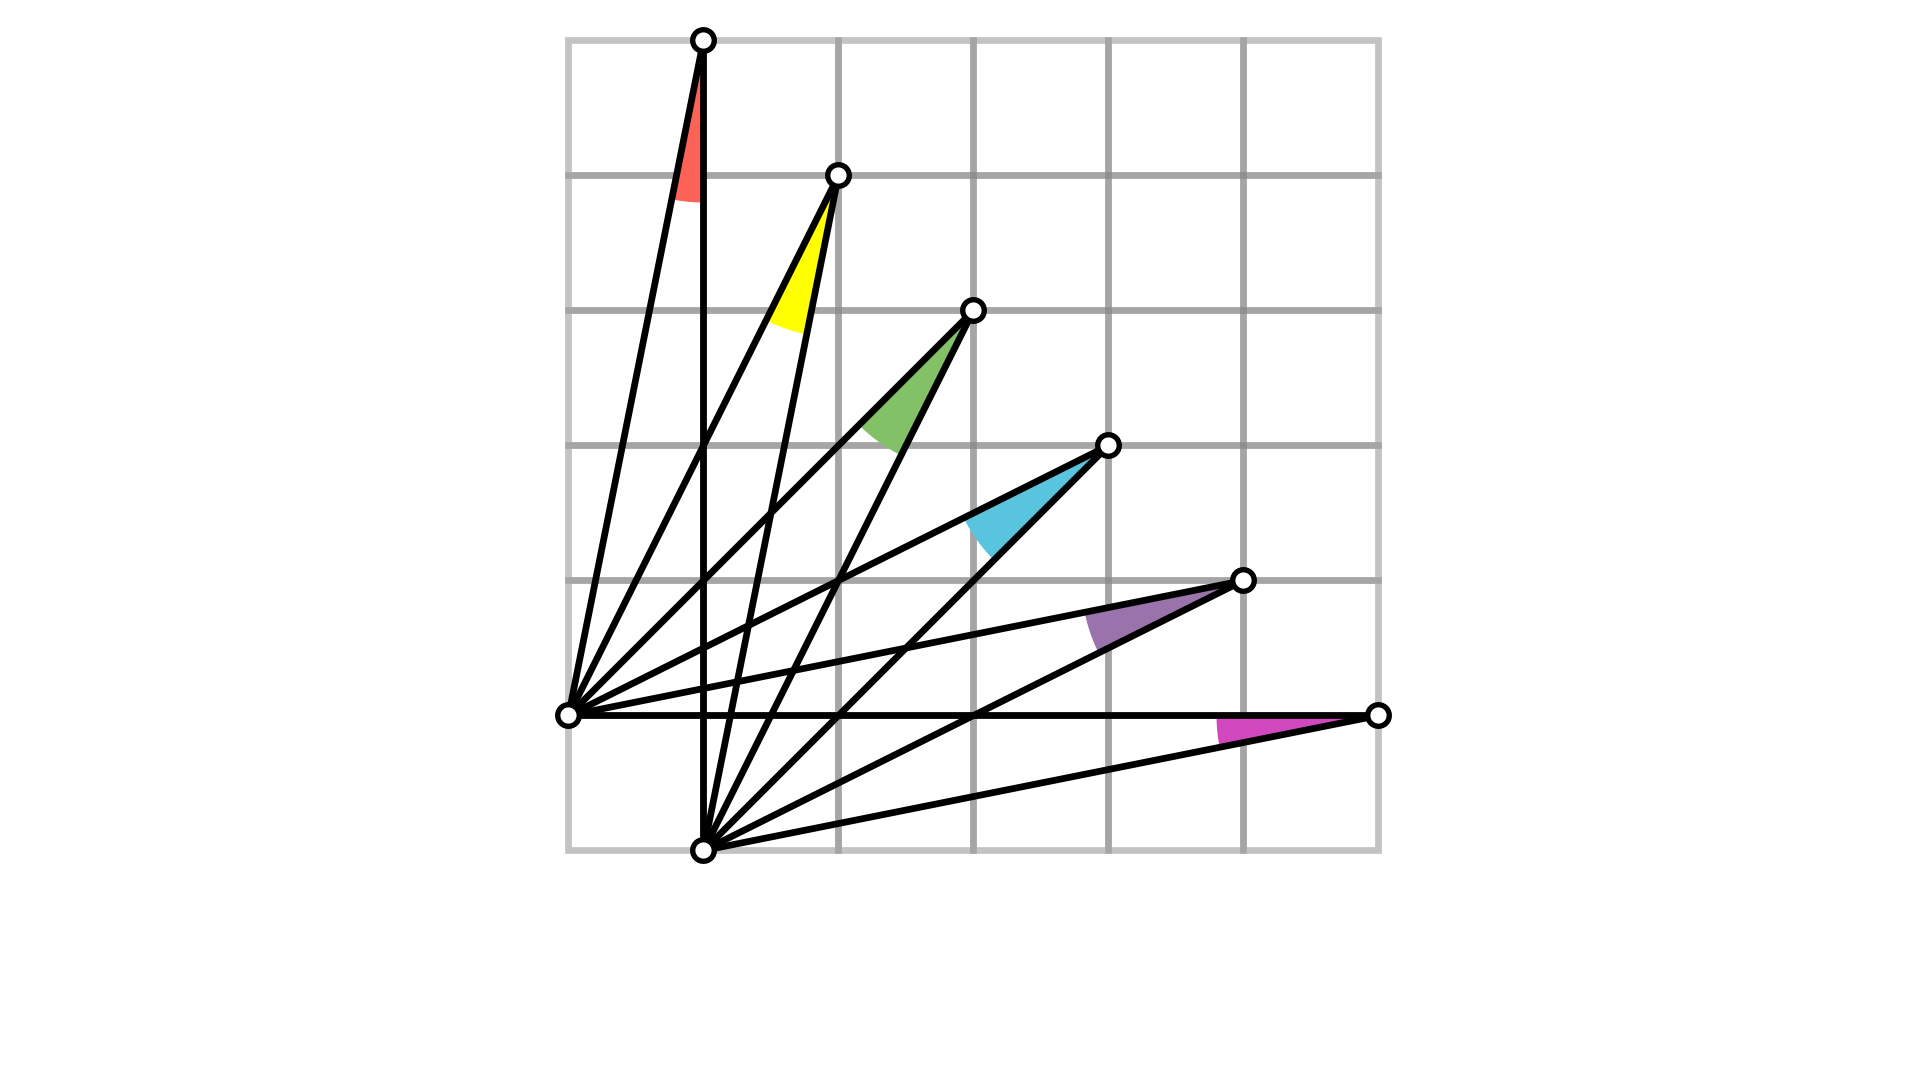

In [4]:
%%manim -pqh Grid
config.background_color = WHITE
from manim import *

class Grid(Scene):
    def construct(self):
        # Add grids
        rows = 6
        cols = 6
        grid = VGroup(*[
            VGroup(*[Square(side_length=1, fill_opacity=0, stroke_width=5, stroke_opacity = 0.5).move_to((i-rows//2)*RIGHT + (j-cols//2)*UP) for j in range(cols)]) for i in range(rows)
        ]).set_color(GREY).shift(0.6*RIGHT+1.2*UP)
        
        # Add lines
        line1 = Line(grid[0][5].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5)
        line3 = Line(grid[1][4].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5)
        line5 = Line(grid[2][3].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5)
        line7 = Line(grid[3][2].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5)
        line9 = Line(grid[4][1].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5)
        line11 = Line(grid[5][0].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5)
        line2 = Line(grid[0][5].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5)
        line4 = Line(grid[1][4].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5)
        line6 = Line(grid[2][3].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5)
        line8 = Line(grid[3][2].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5)
        line10 = Line(grid[4][1].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5)
        line12 = Line(grid[5][0].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5)
        
        # Add dots
        dot1 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line1.get_start())
        dot2 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line1.get_end())
        dot3 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line3.get_start())
        dot4 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line4.get_end())
        dot5 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line5.get_start())
        dot6 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line7.get_start())
        dot7 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line9.get_start())
        dot8 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line11.get_start())
        
        # Add sectors
        sector1 = Sector(arc_center=line2.get_start(), outer_radius=1.2, start_angle=line1.get_angle(), angle=PI/15, fill_opacity=1, fill_color=RED)
        sector2 = Sector(arc_center=line4.get_start(), outer_radius=1.2, start_angle=line3.get_angle(), angle=PI/12, fill_opacity=1, fill_color=YELLOW)
        sector3 = Sector(arc_center=line6.get_start(), outer_radius=1.2, start_angle=line5.get_angle(), angle=PI/10, fill_opacity=1, fill_color=GREEN)
        sector4 = Sector(arc_center=line8.get_start(), outer_radius=1.2, start_angle=line7.get_angle(), angle=PI/10, fill_opacity=1, fill_color=BLUE)
        sector5 = Sector(arc_center=line10.get_start(), outer_radius=1.2, start_angle=line9.get_angle(), angle=PI/12, fill_opacity=1, fill_color=PURPLE)
        sector6 = Sector(arc_center=line12.get_start(), outer_radius=1.2, start_angle=line11.get_angle(), angle=PI/15, fill_opacity=1, fill_color=PINK)
        
        # Add objects to the scene
        self.add(grid)
        self.add(sector1, sector2, sector3, sector4, sector5, sector6)
        self.add(line1, line2, line3, line4, line5, line6, line7, line8, line9, line10, line11, line12, dot1, dot2, dot3, dot4, dot5, dot6, dot7, dot8)


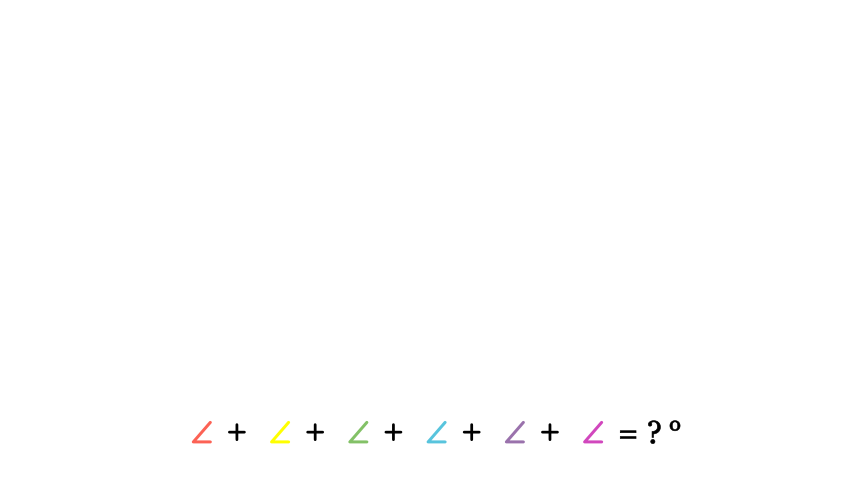

In [5]:
%%manim -pql Question
from manim import *
class Question(Scene):
    def construct(self):
        # Create angle symbols
        angle_red = Tex("$\\angle$", color=RED).scale(1).set_stroke(width = 3)
        angle_yellow = Tex("$\\angle$", color=YELLOW).scale(1).set_stroke(width = 3)
        angle_green = Tex("$\\angle$", color=GREEN).scale(1).set_stroke(width = 3)
        angle_blue = Tex("$\\angle$", color=BLUE).scale(1).set_stroke(width = 3)
        angle_purple = Tex("$\\angle$", color=PURPLE).scale(1).set_stroke(width = 3)
        angle_pink = Tex("$\\angle$", color=PINK).scale(1).set_stroke(width = 3)

        # Position angle symbols
        angle_red.shift(3.2*DOWN+3.75*LEFT)
        angle_yellow.next_to(angle_red, RIGHT, buff=1)
        angle_green.next_to(angle_yellow, RIGHT, buff=1)
        angle_blue.next_to(angle_green, RIGHT, buff=1)
        angle_purple.next_to(angle_blue, RIGHT, buff=1)
        angle_pink.next_to(angle_purple, RIGHT, buff=1)

        # Create plus signs
        plus1 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus2 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus3 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus4 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus5 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)

        # Position plus signs
        plus1.next_to(angle_red, RIGHT, buff=0.3)
        plus2.next_to(angle_yellow, RIGHT, buff=0.3)
        plus3.next_to(angle_green, RIGHT, buff=0.3)
        plus4.next_to(angle_blue, RIGHT, buff=0.3)
        plus5.next_to(angle_purple, RIGHT, buff=0.3)
        
        # Add =?°
        symbol = Text(" = ? °").scale(0.8).set_color(BLACK).set_stroke(width = 1)
        symbol.next_to(angle_pink, RIGHT, buff=0.3)

        # Add objects to the scene
        self.add(symbol, angle_red, angle_yellow, angle_green, angle_blue, angle_purple, angle_pink, plus1, plus2, plus3, plus4, plus5)

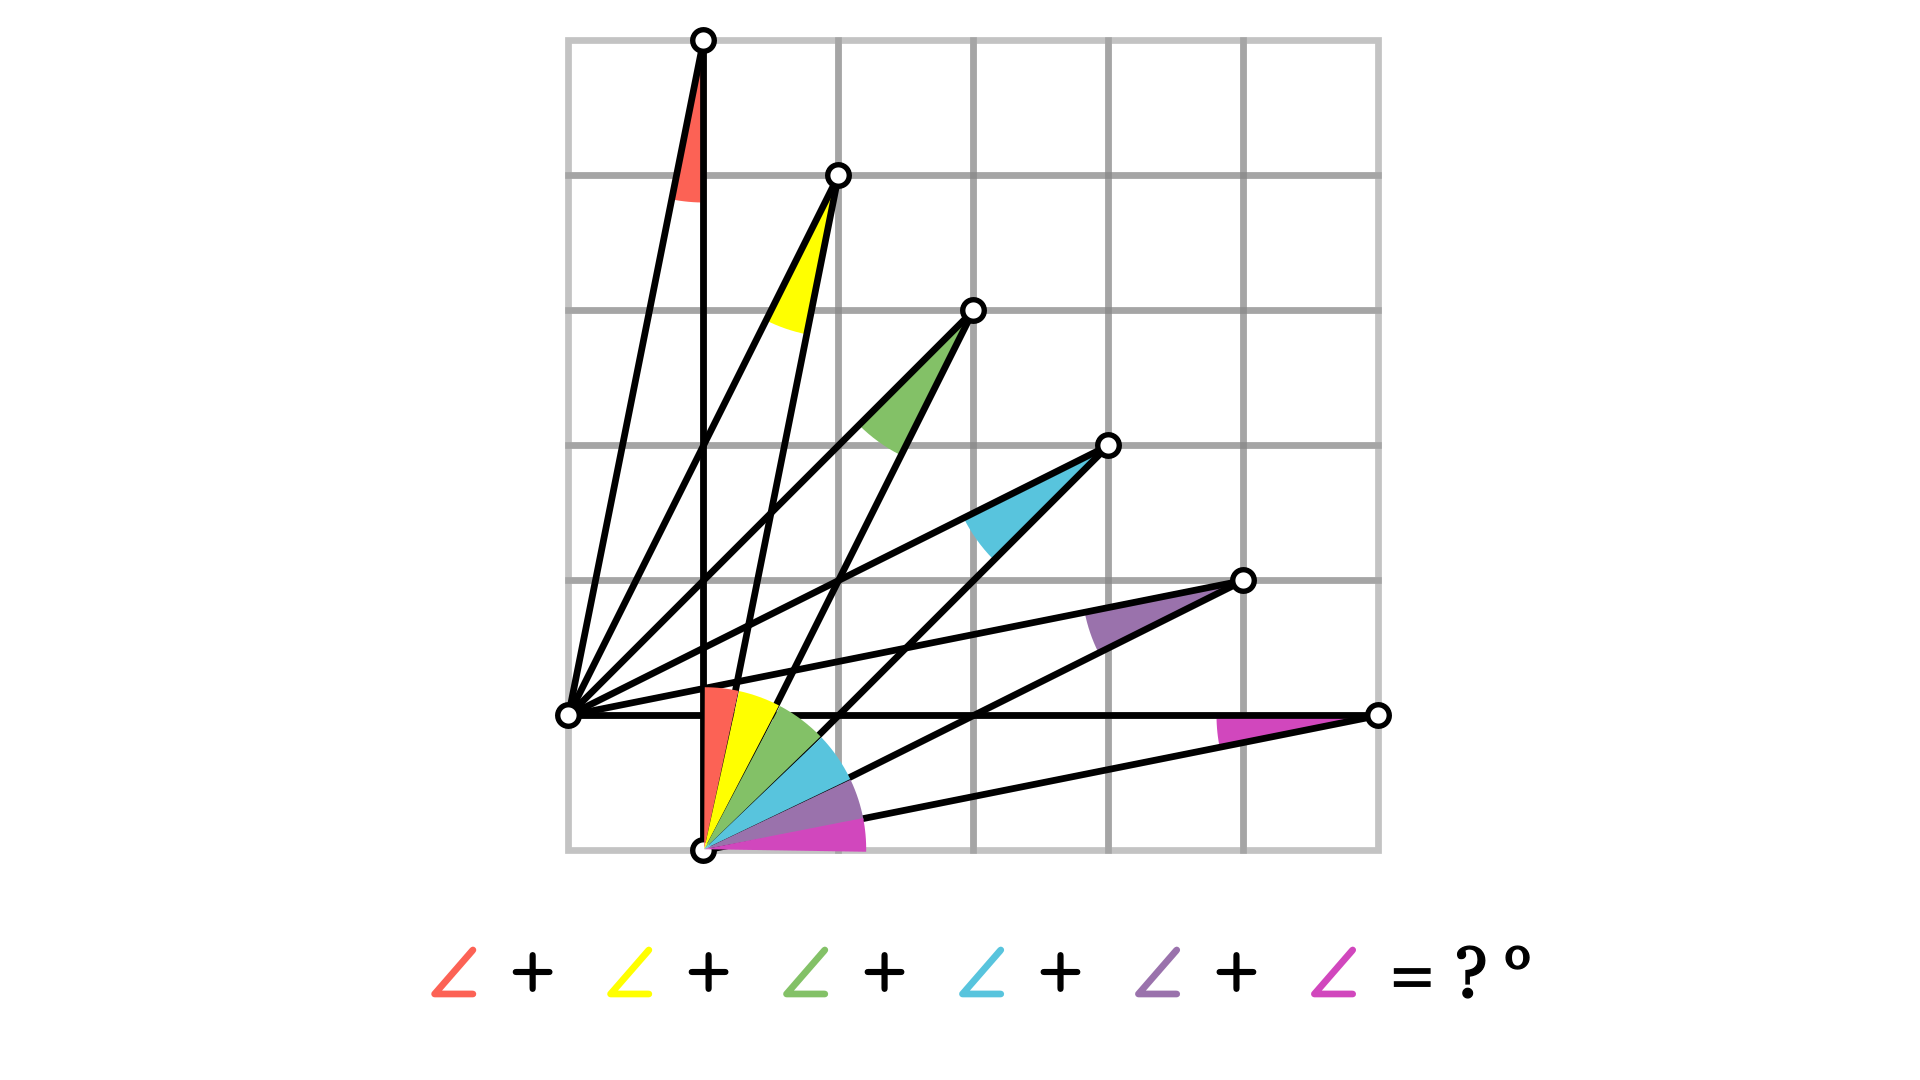

In [42]:
%%manim -pqh Grid
config.background_color = WHITE
from manim import *

class Grid(Scene):
    def construct(self):
        # Add grids
        rows = 6
        cols = 6
        grid = VGroup(*[
            VGroup(*[Square(side_length=1, fill_opacity=0, stroke_width=5, stroke_opacity = 0.5).move_to((i-rows//2)*RIGHT + (j-cols//2)*UP) for j in range(cols)]) for i in range(rows)
        ]).set_color(GREY).shift(0.6*RIGHT+1.2*UP)
        
        # Add lines
        line1 = Line(grid[0][5].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5)
        line2 = Line(grid[0][5].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5)
        line3 = Line(grid[1][4].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5)
        line4 = Line(grid[1][4].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5)
        line5 = Line(grid[2][3].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5)
        line6 = Line(grid[2][3].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5)
        line7 = Line(grid[3][2].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5)
        line8 = Line(grid[3][2].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5)
        line9 = Line(grid[4][1].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5)
        line10 = Line(grid[4][1].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5)
        line11 = Line(grid[5][0].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5)
        line12 = Line(grid[5][0].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5)
        
        # Add dots
        dot1 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line1.get_start())
        dot2 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line1.get_end())
        dot3 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line3.get_start())
        dot4 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line4.get_end())
        dot5 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line5.get_start())
        dot6 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line7.get_start())
        dot7 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line9.get_start())
        dot8 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line11.get_start())
        
        # Add sectors
        sector1 = Sector(arc_center=line2.get_start(), outer_radius=1.2, start_angle=line1.get_angle(), angle=PI/15, fill_opacity=1, fill_color=RED)
        sector2 = Sector(arc_center=line4.get_start(), outer_radius=1.2, start_angle=line3.get_angle(), angle=PI/12, fill_opacity=1, fill_color=YELLOW)
        sector3 = Sector(arc_center=line6.get_start(), outer_radius=1.2, start_angle=line5.get_angle(), angle=PI/10, fill_opacity=1, fill_color=GREEN)
        sector4 = Sector(arc_center=line8.get_start(), outer_radius=1.2, start_angle=line7.get_angle(), angle=PI/10, fill_opacity=1, fill_color=BLUE)
        sector5 = Sector(arc_center=line10.get_start(), outer_radius=1.2, start_angle=line9.get_angle(), angle=PI/12, fill_opacity=1, fill_color=PURPLE)
        sector6 = Sector(arc_center=line12.get_start(), outer_radius=1.2, start_angle=line11.get_angle(), angle=PI/15, fill_opacity=1, fill_color=PINK)
        
        # Add objects to the scene
        self.add(grid)
        self.add(sector1, sector2, sector3, sector4, sector5, sector6)
        self.add(line1, line2, line3, line4, line5, line6, line7, line8, line9, line10, line11, line12, dot1, dot2, dot3, dot4, dot5, dot6, dot7, dot8)
        
        # Make arrays
        colors = [RED, YELLOW, GREEN, BLUE, PURPLE, PINK]
        angles = []
        plus_signs = []
        
        # Using loop, add angle symbols and plus signs as required
        for i in range(len(colors)):
            angle = Tex("$\\angle$", color=colors[i]).scale(1).set_stroke(width=3)
            if i == 0:
                angle.shift(3.2*DOWN+3.75*LEFT)
            else:
                angle.next_to(angles[-1], RIGHT, buff=1)
            angles.append(angle)

            if i < len(colors)-1:
                plus_sign = Tex("+", color=BLACK).scale(0.8).set_stroke(width=3)
                plus_sign.next_to(angle, RIGHT, buff=0.3)
                plus_signs.append(plus_sign)
                
        # Add = ? °
        symbol = Text(" = ? °").scale(0.8).set_color(BLACK).set_stroke(width=1)
        symbol.next_to(angles[-1], RIGHT, buff=0.3)
        
        # Add objects to the scene
        self.add(symbol, *angles, *plus_signs)
        
        # Add sectors for the solution
        sector7 = Sector(arc_center=line2.get_end(), outer_radius=1.2, start_angle=line1.get_angle(), angle=PI/15, fill_opacity=1, fill_color=RED)
        sector8 = Sector(arc_center=line4.get_end(), outer_radius=1.2, start_angle=line3.get_angle(), angle=PI/12, fill_opacity=1, fill_color=YELLOW)
        sector9 = Sector(arc_center=line6.get_end(), outer_radius=1.2, start_angle=line5.get_angle(), angle=PI/10, fill_opacity=1, fill_color=GREEN)
        sector10 = Sector(arc_center=line8.get_end(), outer_radius=1.2, start_angle=line7.get_angle(), angle=PI/10, fill_opacity=1, fill_color=BLUE)
        sector11 = Sector(arc_center=line10.get_end(), outer_radius=1.2, start_angle=line9.get_angle(), angle=PI/12, fill_opacity=1, fill_color=PURPLE)
        sector12 = Sector(arc_center=line12.get_end(), outer_radius=1.2, start_angle=line11.get_angle(), angle=PI/15, fill_opacity=1, fill_color=PINK)
        self.add(sector7, sector8, sector9, sector10, sector11, sector12)
        
        sectors_group = VGroup(sector7, sector8, sector9, sector10, sector11, sector12)

        # Rotate the sectors by 180 degrees
        sectors_group.rotate(PI-0.005*PI).shift(1.2*UP+1.2*RIGHT)

        # Add the group to the scene
        self.add(sectors_group)

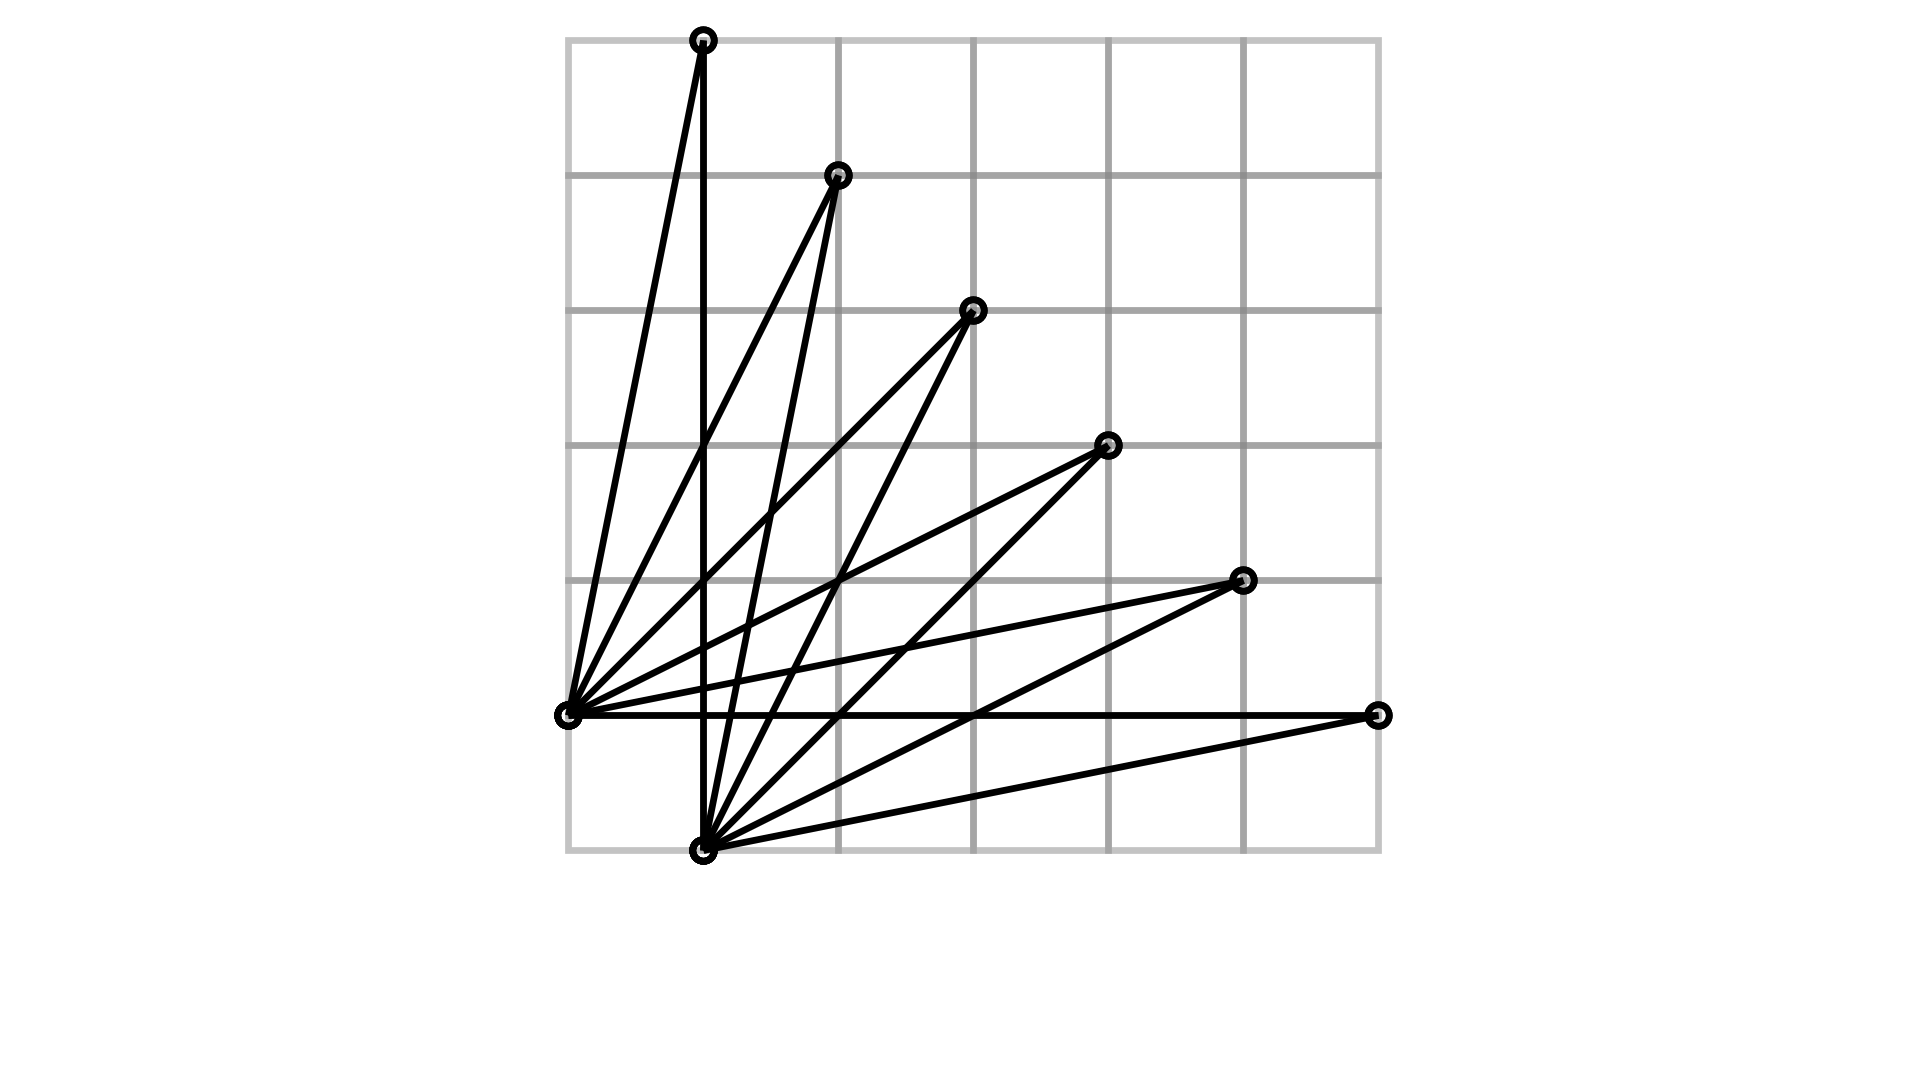

In [84]:
%%manim -pqh Grid
config.background_color = WHITE
from manim import *
class Grid(Scene):
    def construct(self):
        # Add grids
        rows = 6
        cols = 6
        grid = VGroup(*[
            VGroup(*[Square(side_length=1, fill_opacity=0, stroke_width=5, stroke_opacity = 0.5).move_to((i-rows//2)*RIGHT + (j-cols//2)*UP) for j in range(cols)]) for i in range(rows)
        ]).set_color(GREY).shift(0.6*RIGHT+1.2*UP)
        
        # Add lines
        line_positions = [
            (0, 5, 0, 1), (1, 4, 0, 1), (2, 3, 0, 1), (3, 2, 0, 1), (4, 1, 0, 1), (5, 0, 0, 1),
            (0, 5, 1, 0), (1, 4, 1, 0), (2, 3, 1, 0), (3, 2, 1, 0), (4, 1, 1, 0), (5, 0, 1, 0),
        ]
        lines = VGroup(*[
            Line(grid[i][j].get_corner(UR), grid[k][l].get_corner(DL), color=BLACK, stroke_width=5) for i, j, k, l in line_positions
        ])
        
        # Add dots
        dots = VGroup(*[
            Dot(lines[i].get_start(), color=BLACK, fill_color = WHITE, fill_opacity = 1).match_style(lines[i]) for i in range(len(lines))
        ])
        dots += VGroup(*[
            Dot(lines[i].get_end(), color=BLACK, fill_color = WHITE, fill_opacity = 1).match_style(lines[i]) for i in range(len(lines))
        ])
        self.add(grid, lines)
        self.add(dots)


In [16]:
%%manim -pql Grid
config.background_color = WHITE
from manim import *

class Grid(Scene):
    def construct(self):
        # Add grids
        rows = 6
        cols = 6
        grid = VGroup(*[
            VGroup(*[Square(side_length=1, fill_opacity=0, stroke_width=5, stroke_opacity = 0.5).move_to((i-rows//2)*RIGHT + (j-cols//2)*UP) for j in range(cols)]) for i in range(rows)
        ]).set_color(GREY).shift(0.6*RIGHT+1.2*UP)

        # Add lines
        line_positions = [
            (0, 5, 0, 1), (1, 4, 0, 1), (2, 3, 0, 1), (3, 2, 0, 1), (4, 1, 0, 1), (5, 0, 0, 1),
            (0, 5, 1, 0), (1, 4, 1, 0), (2, 3, 1, 0), (3, 2, 1, 0), (4, 1, 1, 0), (5, 0, 1, 0),
        ]
        lines = VGroup(*[
            Line(grid[i][j].get_corner(UR), grid[k][l].get_corner(DL), color=BLACK, stroke_width=5) for i, j, k, l in line_positions
        ]).set_z_index(2)

        # Add dots
        dots = VGroup(*[
        Dot(lines[i].get_start(), color=WHITE, fill_opacity=1, stroke_width=4, stroke_color = BLACK) for i in range(len(lines))
            ]).set_z_index(4)
        dots += VGroup(*[
            Dot(lines[i].get_end(), color=WHITE, fill_opacity=1, stroke_width=4, stroke_color = BLACK) for i in range(len(lines))
        ]).set_z_index(6)

        # Create the sectors
        sector_data = []
        colors = [RED, YELLOW, GREEN, BLUE, PURPLE, PINK]
        angles = [PI/15, PI/12, PI/10, PI/10, PI/12, PI/15]

        for i in range(6):
            sector_data.append((lines[i], lines[i], colors[i], angles[i]))

        sectors = []
        for line1, line2, color, angle in sector_data:
            sector = Sector(
                arc_center=line2.get_start(),
                outer_radius=1.2,
                start_angle=line1.get_angle(),
                angle=angle,
                fill_opacity=1,
                fill_color=color,
            )
            sectors.append(sector)
        sectors = VGroup(*sectors)
        #self.add(grid)
        self.play(FadeIn(grid), run_length=4)
        self.wait()
        #self.add(dots)
        self.play(FadeIn(dots))
        self.wait()
        #self.add(lines)
        self.play(FadeIn(lines), run_length = 4)
        self.wait()
        #self.add(sectors)
        self.play(FadeIn(sectors))
        
        # Make arrays
        colors = [RED, YELLOW, GREEN, BLUE, PURPLE, PINK]
        angles = []
        plus_signs = []
        
        # Using loop, add angle symbols and plus signs as required
        for i in range(len(colors)):
            angle = Tex("$\\angle$", color=colors[i]).scale(1).set_stroke(width=3)
            if i == 0:
                angle.shift(3.2*DOWN+3.75*LEFT)
            else:
                angle.next_to(angles[-1], RIGHT, buff=1)
            angles.append(angle)

            if i < len(colors)-1:
                plus_sign = Tex("+", color=BLACK).scale(0.8).set_stroke(width=3)
                plus_sign.next_to(angle, RIGHT, buff=0.3)
                plus_signs.append(plus_sign)
                
        # Add = ? °
        symbol = Text(" = ? °").scale(0.8).set_color(BLACK).set_stroke(width=1)
        symbol.next_to(angles[-1], RIGHT, buff=0.3)
        
        # Add objects to the scene
        self.wait()
        self.add(symbol, *angles, *plus_signs)
        self.wait()
        
        # Create the sectors for the solution
        sector_data1 = []
        colors1 = [RED, YELLOW, GREEN, BLUE, PURPLE, PINK]
        angles1 = [PI/15, PI/12, PI/10, PI/10, PI/12, PI/15]

        for i in range(6):
            sector_data1.append((lines[i], lines[i], colors1[i], angles1[i]))

        sectors1 = []
        for line1, line2, color, angle in sector_data:
            sector1 = Sector(
                arc_center=line2.get_end(),
                outer_radius=1.2,
                start_angle=line1.get_angle(),
                angle=angle,
                fill_opacity=1,
                fill_color=color,
            )
            sectors1.append(sector1)
        sectors1 = VGroup(*sectors1)
        sectors1.rotate(PI-0.005*PI).shift(2.18*RIGHT+0.17*UP)
        #self.add(sectors1)
        self.play(Create(sectors1))
        self.wait(4)

In [1]:
%%manim -pql Grid
config.background_color = WHITE
from manim import *

class Grid(Scene):
    def construct(self):
        rows = 6
        cols = 6
        title = Tex("Here is a 6x6 grid").set_color(BLACK)
        grid = VGroup(*[
            VGroup(*[Square(side_length=1, fill_opacity=0, stroke_width=5, stroke_opacity = 0.5).move_to((i-rows//2)*RIGHT + (j-cols//2)*UP) for j in range(cols)]) for i in range(rows)
        ]).set_color(GREY).shift(0.6*RIGHT+1.2*UP)
        
        # Add lines
        line1 = Line(grid[0][5].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line2 = Line(grid[0][5].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        line3 = Line(grid[1][4].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line4 = Line(grid[1][4].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        line5 = Line(grid[2][3].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line6 = Line(grid[2][3].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        line7 = Line(grid[3][2].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line8 = Line(grid[3][2].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        line9 = Line(grid[4][1].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line10 = Line(grid[4][1].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        line11 = Line(grid[5][0].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line12 = Line(grid[5][0].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        
        
        #Add sectors
        sector1 = Sector(arc_center=line2.get_start(), outer_radius=1.2, start_angle=line1.get_angle(), angle=PI/15.5, fill_opacity=1, fill_color=RED)
        sector2 = Sector(arc_center=line4.get_start(), outer_radius=1.2, start_angle=line3.get_angle(), angle=PI/11.5, fill_opacity=1, fill_color=YELLOW)
        sector3 = Sector(arc_center=line6.get_start(), outer_radius=1.2, start_angle=line5.get_angle(), angle=PI/9.5, fill_opacity=1, fill_color=GREEN)
        sector4 = Sector(arc_center=line8.get_start(), outer_radius=1.2, start_angle=line7.get_angle(), angle=PI/9.5, fill_opacity=1, fill_color=BLUE)
        sector5 = Sector(arc_center=line10.get_start(), outer_radius=1.2, start_angle=line9.get_angle(), angle=PI/11.5, fill_opacity=1, fill_color=PURPLE)
        sector6 = Sector(arc_center=line12.get_start(), outer_radius=1.2, start_angle=line11.get_angle(), angle=PI/15.5, fill_opacity=1, fill_color=PINK)
        
        #Add dots
        dot1 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line1.get_start()).set_z_index(4)
        dot2 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line1.get_end()).set_z_index(4)
        dot3 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line3.get_start()).set_z_index(4)
        dot4 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line4.get_end()).set_z_index(4)
        dot5 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line5.get_start()).set_z_index(4)
        dot6 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line7.get_start()).set_z_index(4)
        dot7 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line9.get_start()).set_z_index(4)
        dot8 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line11.get_start()).set_z_index(4)
        
        # Create angle symbols
        angle_red = Tex("$\\angle$", color=RED).scale(1).set_stroke(width = 3)
        angle_yellow = Tex("$\\angle$", color=YELLOW).scale(1).set_stroke(width = 3)
        angle_green = Tex("$\\angle$", color=GREEN).scale(1).set_stroke(width = 3)
        angle_blue = Tex("$\\angle$", color=BLUE).scale(1).set_stroke(width = 3)
        angle_purple = Tex("$\\angle$", color=PURPLE).scale(1).set_stroke(width = 3)
        angle_pink = Tex("$\\angle$", color=PINK).scale(1).set_stroke(width = 3)

        # Position angle symbols
        angle_red.shift(3.2*DOWN+3.75*LEFT)
        angle_yellow.next_to(angle_red, RIGHT, buff=1)
        angle_green.next_to(angle_yellow, RIGHT, buff=1)
        angle_blue.next_to(angle_green, RIGHT, buff=1)
        angle_purple.next_to(angle_blue, RIGHT, buff=1)
        angle_pink.next_to(angle_purple, RIGHT, buff=1)

        # Create plus signs
        plus1 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus2 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus3 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus4 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus5 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)

        # Position plus signs
        plus1.next_to(angle_red, RIGHT, buff=0.3)
        plus2.next_to(angle_yellow, RIGHT, buff=0.3)
        plus3.next_to(angle_green, RIGHT, buff=0.3)
        plus4.next_to(angle_blue, RIGHT, buff=0.3)
        plus5.next_to(angle_purple, RIGHT, buff=0.3)
        
        #Add =?°
        symbol = Text(" = ? °").scale(0.8).set_color(BLACK).set_stroke(width = 1)
        symbol.next_to(angle_pink, RIGHT, buff=0.3)

        # Add objects to the scene
        #self.play(FadeIn(title))
        #self.wait(2)
        #self.play(FadeOut(title))
        self.wait()
        self.play(FadeIn(grid))
        self.wait(2)
        #self.add(line1, line2, line3, line4, line5, line6, line7, line8, line9, line10, line11, line12, dot1, dot2, dot3, dot4, dot5, dot6, dot7, dot8)
        self.play(FadeIn(dot2, dot4))
        self.wait(2)
        self.play(FadeIn(dot1, dot3, dot5, dot6, dot7, dot8))
        self.wait(3)
        self.play(Create(line1))
        self.play(Create(line2))
        self.play(Create(line3))
        self.play(Create(line4))
        self.play(Create(line5))
        self.play(Create(line6))
        self.play(Create(line7))
        self.play(Create(line8))
        self.play(Create(line9))
        self.play(Create(line10))
        self.play(Create(line11))
        self.play(Create(line12))
        self.wait(2)
        #self.add(sector1, sector2, sector3, sector4, sector5, sector6)
        self.play(FadeIn(sector1, sector2, sector3, sector4, sector5, sector6))
        self.wait(3)
        text_group = VGroup(symbol, angle_red, angle_yellow, angle_green, angle_blue, angle_purple, angle_pink, plus1, plus2, plus3, plus4, plus5)
        self.wait(2)
        self.play(FadeIn(text_group))
        self.wait(5)
        
        # Add sectors for the solution
        sector_compare = Sector(arc_center=line2.get_end(), outer_radius=1.2, start_angle=line1.get_angle(), angle=PI/15.5, fill_opacity=1, fill_color=RED).rotate(PI).shift(1.2*UP+0.22*RIGHT)
        #Analysing first angle (red one)
        self.play(FadeOut(line3, line5, line6, line7, line8, line9, line10, line11, line12, dot5, dot6, dot7, dot8, sector2, sector3, sector4, sector5, sector6))
        self.wait(3)
        self.play(Indicate(line1), Indicate(line4), color = PURPLE)
        self.wait()
        self.play(Indicate(line2), color = PINK)
        self.wait()
        self.play(FadeIn(sector_compare))
        self.wait(5)
        self.play(FadeIn(line3, line5, line6, line7, line8, line9, line10, line11, line12, dot5, dot6, dot7, dot8, sector2, sector3, sector4, sector5, sector6))
        self.wait(4)
        #self.play(FadeIn(sector7.set_z_index(8)))
        sector7 = Sector(arc_center=line2.get_end(), outer_radius=1.2, start_angle=line1.get_angle(), angle=PI/15.5, fill_opacity=1, fill_color=RED)
        sector8 = Sector(arc_center=line4.get_end(), outer_radius=1.2, start_angle=line3.get_angle(), angle=PI/11.5, fill_opacity=1, fill_color=YELLOW)
        sector9 = Sector(arc_center=line6.get_end(), outer_radius=1.2, start_angle=line5.get_angle(), angle=PI/9.5, fill_opacity=1, fill_color=GREEN)
        sector10 = Sector(arc_center=line8.get_end(), outer_radius=1.2, start_angle=line7.get_angle(), angle=PI/9.5, fill_opacity=1, fill_color=BLUE)
        sector11 = Sector(arc_center=line10.get_end(), outer_radius=1.2, start_angle=line9.get_angle(), angle=PI/11.5, fill_opacity=1, fill_color=PURPLE)
        sector12 = Sector(arc_center=line12.get_end(), outer_radius=1.2, start_angle=line11.get_angle(), angle=PI/15.5, fill_opacity=1, fill_color=PINK)
        self.add(sector7, sector8, sector9, sector10, sector11, sector12)
        
        sectors_group = VGroup(sector7, sector8, sector9, sector10, sector11, sector12)

        # Rotate the sectors by 180 degrees
        sectors_group.rotate(PI).shift(1.18*UP+1.2*RIGHT)

        # Add the group to the scene
        self.play(Create(sectors_group, run_time =4),FadeOut(sector_compare))
        self.wait(2)
        
        # Copy the sectors group
        sectors_copy = sectors_group.copy()
        
        #answer
        equal_to = Text(" = ").scale(0.8).set_color(BLACK).set_stroke(width = 1)
        equal_to.next_to(angle_pink, RIGHT, buff=0.3)
        self.play(Indicate(sectors_group), run_length = 4, color = None)
        self.wait()
        self.play(sectors_copy.animate.next_to(angle_pink, RIGHT, buff=0.6).scale(0.5), FadeOut(symbol), FadeIn(equal_to) )
        self.wait(5)
        answer = Text(" = 90°").scale(0.8).set_color(BLACK).set_stroke(width = 1)
        answer.next_to(angle_pink, RIGHT, buff=1.8)
        self.play(FadeIn(answer))
        self.wait(3)

UsageError: Cell magic `%%manim` not found.


In [7]:
%%manim -pqh Grid
config.background_color = WHITE
from manim import *

class Grid(Scene):
    def construct(self):
        rows = 6
        cols = 6
        title = Tex("Here is a 6x6 grid").set_color(BLACK)
        grid = VGroup(*[
            VGroup(*[Square(side_length=1, fill_opacity=0, stroke_width=5, stroke_opacity = 0.5).move_to((i-rows//2)*RIGHT + (j-cols//2)*UP) for j in range(cols)]) for i in range(rows)
        ]).set_color(GREY).shift(0.6*RIGHT+1.2*UP)
        
        # Add lines
        line1 = Line(grid[0][5].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line2 = Line(grid[0][5].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        line3 = Line(grid[1][4].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line4 = Line(grid[1][4].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        line5 = Line(grid[2][3].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line6 = Line(grid[2][3].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        line7 = Line(grid[3][2].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line8 = Line(grid[3][2].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        line9 = Line(grid[4][1].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line10 = Line(grid[4][1].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        line11 = Line(grid[5][0].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line12 = Line(grid[5][0].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        
        
        #Add sectors
        sector1 = Sector(arc_center=line2.get_start(), outer_radius=1.2, start_angle=line1.get_angle(), angle=PI/15.5, fill_opacity=1, fill_color=RED)
        sector2 = Sector(arc_center=line4.get_start(), outer_radius=1.2, start_angle=line3.get_angle(), angle=PI/11.5, fill_opacity=1, fill_color=YELLOW)
        sector3 = Sector(arc_center=line6.get_start(), outer_radius=1.2, start_angle=line5.get_angle(), angle=PI/9.5, fill_opacity=1, fill_color=GREEN)
        sector4 = Sector(arc_center=line8.get_start(), outer_radius=1.2, start_angle=line7.get_angle(), angle=PI/9.5, fill_opacity=1, fill_color=BLUE)
        sector5 = Sector(arc_center=line10.get_start(), outer_radius=1.2, start_angle=line9.get_angle(), angle=PI/11.5, fill_opacity=1, fill_color=PURPLE)
        sector6 = Sector(arc_center=line12.get_start(), outer_radius=1.2, start_angle=line11.get_angle(), angle=PI/15.5, fill_opacity=1, fill_color=PINK)
        
        #Add dots
        dot1 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line1.get_start()).set_z_index(4)
        dot2 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line1.get_end()).set_z_index(4)
        dot3 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line3.get_start()).set_z_index(4)
        dot4 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line4.get_end()).set_z_index(4)
        dot5 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line5.get_start()).set_z_index(4)
        dot6 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line7.get_start()).set_z_index(4)
        dot7 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line9.get_start()).set_z_index(4)
        dot8 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line11.get_start()).set_z_index(4)
        
        # Create angle symbols
        angle_red = Tex("$\\angle$", color=RED).scale(1).set_stroke(width = 3)
        angle_yellow = Tex("$\\angle$", color=YELLOW).scale(1).set_stroke(width = 3)
        angle_green = Tex("$\\angle$", color=GREEN).scale(1).set_stroke(width = 3)
        angle_blue = Tex("$\\angle$", color=BLUE).scale(1).set_stroke(width = 3)
        angle_purple = Tex("$\\angle$", color=PURPLE).scale(1).set_stroke(width = 3)
        angle_pink = Tex("$\\angle$", color=PINK).scale(1).set_stroke(width = 3)

        # Position angle symbols
        angle_red.shift(3.2*DOWN+3.75*LEFT)
        angle_yellow.next_to(angle_red, RIGHT, buff=1)
        angle_green.next_to(angle_yellow, RIGHT, buff=1)
        angle_blue.next_to(angle_green, RIGHT, buff=1)
        angle_purple.next_to(angle_blue, RIGHT, buff=1)
        angle_pink.next_to(angle_purple, RIGHT, buff=1)

        # Create plus signs
        plus1 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus2 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus3 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus4 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus5 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)

        # Position plus signs
        plus1.next_to(angle_red, RIGHT, buff=0.3)
        plus2.next_to(angle_yellow, RIGHT, buff=0.3)
        plus3.next_to(angle_green, RIGHT, buff=0.3)
        plus4.next_to(angle_blue, RIGHT, buff=0.3)
        plus5.next_to(angle_purple, RIGHT, buff=0.3)
        
        #Add =?°
        symbol = Text(" = ? °").scale(0.8).set_color(BLACK).set_stroke(width = 1)
        symbol.next_to(angle_pink, RIGHT, buff=0.3)

        # Add objects to the scene
        #self.play(FadeIn(title))
        #self.wait(2)
        #self.play(FadeOut(title))
        self.wait()
        self.play(FadeIn(grid))
        self.wait(2)
        #self.add(line1, line2, line3, line4, line5, line6, line7, line8, line9, line10, line11, line12, dot1, dot2, dot3, dot4, dot5, dot6, dot7, dot8)
        self.play(FadeIn(dot2, dot4))
        self.wait(2)
        self.play(FadeIn(dot1, dot3, dot5, dot6, dot7, dot8))
        self.wait(3)
        self.play(Create(line1))
        self.play(Create(line2))
        self.play(Create(line3))
        self.play(Create(line4))
        self.play(Create(line5))
        self.play(Create(line6))
        self.play(Create(line7))
        self.play(Create(line8))
        self.play(Create(line9))
        self.play(Create(line10))
        self.play(Create(line11))
        self.play(Create(line12))
        self.wait(2)
        #self.add(sector1, sector2, sector3, sector4, sector5, sector6)
        self.play(FadeIn(sector1, sector2, sector3, sector4, sector5, sector6))
        self.wait(3)
        text_group = VGroup(symbol, angle_red, angle_yellow, angle_green, angle_blue, angle_purple, angle_pink, plus1, plus2, plus3, plus4, plus5)
        self.wait(2)
        self.play(FadeIn(text_group))
        self.wait(5)
        
        # Add sectors for the solution
        sector_compare = Sector(arc_center=line2.get_end(), outer_radius=1.2, start_angle=line1.get_angle(), angle=PI/15.5, fill_opacity=1, fill_color=RED).rotate(PI).shift(1.2*UP+0.22*RIGHT)
        #Analysing first angle (red one)
        self.play(FadeOut(line3, line5, line6, line7, line8, line9, line10, line11, line12, dot5, dot6, dot7, dot8, sector2, sector3, sector4, sector5, sector6))
        self.wait(3)
        self.play(Indicate(line1), Indicate(line4))
        self.wait()
        self.play(Indicate(line2))
        self.wait()
        sector1_copy = sector1.copy()
        self.play(Transform(sector1_copy, sector_compare))
        self.wait()
        self.play(Indicate(sector1), Indicate(sector_compare))
        self.wait(4)
        self.play(FadeIn(line3, line5, line6, line7, line8, line9, line10, line11, line12, dot5, dot6, dot7, dot8, sector2, sector3, sector4, sector5, sector6))
        self.wait(4)
        #self.play(FadeIn(sector7.set_z_index(8)))
        sector7 = Sector(arc_center=line2.get_end(), outer_radius=1.2, start_angle=line1.get_angle(), angle=PI/15.5, fill_opacity=1, fill_color=RED)
        sector8 = Sector(arc_center=line4.get_end(), outer_radius=1.2, start_angle=line3.get_angle(), angle=PI/11.5, fill_opacity=1, fill_color=YELLOW)
        sector9 = Sector(arc_center=line6.get_end(), outer_radius=1.2, start_angle=line5.get_angle(), angle=PI/9.5, fill_opacity=1, fill_color=GREEN)
        sector10 = Sector(arc_center=line8.get_end(), outer_radius=1.2, start_angle=line7.get_angle(), angle=PI/9.5, fill_opacity=1, fill_color=BLUE)
        sector11 = Sector(arc_center=line10.get_end(), outer_radius=1.2, start_angle=line9.get_angle(), angle=PI/11.5, fill_opacity=1, fill_color=PURPLE)
        sector12 = Sector(arc_center=line12.get_end(), outer_radius=1.2, start_angle=line11.get_angle(), angle=PI/15.5, fill_opacity=1, fill_color=PINK)
        self.add(sector7, sector8, sector9, sector10, sector11, sector12)
        
        sectors_group = VGroup(sector7, sector8, sector9, sector10, sector11, sector12)

        # Rotate the sectors by 180 degrees
        sectors_group.rotate(PI).shift(1.18*UP+1.2*RIGHT)

        # Add the group to the scene
        self.play(Create(sectors_group, run_time =4),FadeOut(sector_compare))
        self.wait(2)
        
        # Copy the sectors group
        sectors_copy = sectors_group.copy()
        
        #answer
        equal_to = Text(" = ").scale(0.8).set_color(BLACK).set_stroke(width = 1)
        equal_to.next_to(angle_pink, RIGHT, buff=0.3)
        self.play(Indicate(sectors_group), run_length = 4, color = None)
        self.wait()
        self.play(sectors_copy.animate.next_to(angle_pink, RIGHT, buff=0.6).scale(0.5), FadeOut(symbol), FadeIn(equal_to) )
        self.wait(5)
        answer = Text(" = 90°").scale(0.8).set_color(BLACK).set_stroke(width = 1)
        answer.next_to(angle_pink, RIGHT, buff=1.8)
        self.play(FadeIn(answer))
        self.wait(3)

In [35]:
%%manim -pqh Grid
from manim import *
config.background_color = WHITE
class Grid(Scene):
    def construct(self):
        rows = 6
        cols = 6
        title = Tex("Here is a 6x6 grid").set_color(BLACK)
        grid = VGroup(*[
            VGroup(*[Square(side_length=1, fill_opacity=0, stroke_width=5, stroke_opacity = 0.5).move_to((i-rows//2)*RIGHT + (j-cols//2)*UP) for j in range(cols)]) for i in range(rows)
        ]).set_color(GREY).shift(0.6*RIGHT+1.2*UP)
        square = Square(side_length=6, fill_opacity=0, stroke_width=5, stroke_opacity = 0.5).set_color(GREY).shift(0.6*RIGHT).set_z_index(3)
        square.move_to(grid.get_center())

        # Add lines
        line1 = Line(grid[0][5].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line2 = Line(grid[0][5].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        line3 = Line(grid[1][4].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line4 = Line(grid[1][4].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        line5 = Line(grid[2][3].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line6 = Line(grid[2][3].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        line7 = Line(grid[3][2].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line8 = Line(grid[3][2].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        line9 = Line(grid[4][1].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line10 = Line(grid[4][1].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        line11 = Line(grid[5][0].get_corner(UR), grid[0][0].get_corner(UL), color=BLACK, stroke_width=5).set_z_index(2)
        line12 = Line(grid[5][0].get_corner(UR), grid[1][0].get_corner(DL), color=BLACK, stroke_width=5).set_z_index(2)
        
        
        #Add sectors
        sector1 = Sector(arc_center=line2.get_start(), outer_radius=1.2, start_angle=line1.get_angle(), angle=PI/15.5, fill_opacity=1, fill_color=RED)
        sector2 = Sector(arc_center=line4.get_start(), outer_radius=1.2, start_angle=line3.get_angle(), angle=PI/11.5, fill_opacity=1, fill_color=YELLOW)
        sector3 = Sector(arc_center=line6.get_start(), outer_radius=1.2, start_angle=line5.get_angle(), angle=PI/9.5, fill_opacity=1, fill_color=GREEN)
        sector4 = Sector(arc_center=line8.get_start(), outer_radius=1.2, start_angle=line7.get_angle(), angle=PI/9.5, fill_opacity=1, fill_color=BLUE)
        sector5 = Sector(arc_center=line10.get_start(), outer_radius=1.2, start_angle=line9.get_angle(), angle=PI/11.5, fill_opacity=1, fill_color=PURPLE)
        sector6 = Sector(arc_center=line12.get_start(), outer_radius=1.2, start_angle=line11.get_angle(), angle=PI/15.5, fill_opacity=1, fill_color=PINK)
        
        #Add dots
        dot1 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line1.get_start()).set_z_index(4)
        dot2 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line1.get_end()).set_z_index(4)
        dot3 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line3.get_start()).set_z_index(4)
        dot4 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line4.get_end()).set_z_index(4)
        dot5 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line5.get_start()).set_z_index(4)
        dot6 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line7.get_start()).set_z_index(4)
        dot7 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line9.get_start()).set_z_index(4)
        dot8 = Circle(radius=0.08, fill_color=WHITE, fill_opacity=1, stroke_width=4, stroke_color=BLACK).move_to(line11.get_start()).set_z_index(4)
        
        # Create angle symbols
        angle_red = Tex("$\\angle$", color=RED).scale(1).set_stroke(width = 3)
        angle_yellow = Tex("$\\angle$", color=YELLOW).scale(1).set_stroke(width = 3)
        angle_green = Tex("$\\angle$", color=GREEN).scale(1).set_stroke(width = 3)
        angle_blue = Tex("$\\angle$", color=BLUE).scale(1).set_stroke(width = 3)
        angle_purple = Tex("$\\angle$", color=PURPLE).scale(1).set_stroke(width = 3)
        angle_pink = Tex("$\\angle$", color=PINK).scale(1).set_stroke(width = 3)

        # Position angle symbols
        angle_red.shift(3.2*DOWN+3.75*LEFT)
        angle_yellow.next_to(angle_red, RIGHT, buff=1)
        angle_green.next_to(angle_yellow, RIGHT, buff=1)
        angle_blue.next_to(angle_green, RIGHT, buff=1)
        angle_purple.next_to(angle_blue, RIGHT, buff=1)
        angle_pink.next_to(angle_purple, RIGHT, buff=1)

        # Create plus signs
        plus1 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus2 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus3 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus4 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)
        plus5 = Tex("+", color=BLACK).scale(0.8).set_stroke(width = 3)

        # Position plus signs
        plus1.next_to(angle_red, RIGHT, buff=0.3)
        plus2.next_to(angle_yellow, RIGHT, buff=0.3)
        plus3.next_to(angle_green, RIGHT, buff=0.3)
        plus4.next_to(angle_blue, RIGHT, buff=0.3)
        plus5.next_to(angle_purple, RIGHT, buff=0.3)
        
        #Add =?°
        symbol = Text(" = ? °").scale(0.8).set_color(BLACK).set_stroke(width = 1)
        symbol.next_to(angle_pink, RIGHT, buff=0.3)

        # Add objects to the scene
        #self.play(FadeIn(title))
        #self.wait(2)
        #self.play(FadeOut(title))
        self.wait()
        self.play(FadeIn(grid), FadeIn(square))
        self.wait(2)
        #self.add(line1, line2, line3, line4, line5, line6, line7, line8, line9, line10, line11, line12, dot1, dot2, dot3, dot4, dot5, dot6, dot7, dot8)
        self.play(FadeIn(dot2, dot4))
        self.wait(2)
        self.play(FadeIn(dot1, dot3, dot5, dot6, dot7, dot8))
        self.wait(3)
        self.play(Create(line1), Create(line3), Create(line5), Create(line7), Create(line9), Create(line11), run_time = 3)
        self.play(Create(line2), Create(line4), Create(line6), Create(line8), Create(line10), Create(line12), run_time = 3)
        #self.play(Create(line3))
        #self.play(Create(line4))
        #self.play(Create(line5))
        #self.play(Create(line6))
        #self.play(Create(line7))
        #self.play(Create(line8))
        #self.play(Create(line9))
        #self.play(Create(line10))
        #self.play(Create(line11))
        #self.play(Create(line12))
        self.wait(2)
        #self.add(sector1, sector2, sector3, sector4, sector5, sector6)
        
        text_group = VGroup(symbol, angle_red, angle_yellow, angle_green, angle_blue, angle_purple, angle_pink, plus1, plus2, plus3, plus4, plus5)
        self.play(FadeIn(sector1, sector2, sector3, sector4, sector5, sector6, text_group))
        self.wait(3)
        
        # Add sectors for the solution
        sector_compare = Sector(arc_center=line2.get_end(), outer_radius=1.2, start_angle=line1.get_angle(), angle=PI/15.5, fill_opacity=1, fill_color=RED).rotate(PI).shift(1.2*UP+0.22*RIGHT)
        #Analysing first angle (red one)
        self.play(FadeOut(line3, line5, line6, line7, line8, line9, line10, line11, line12, dot5, dot6, dot7, dot8, sector2, sector3, sector4, sector5, sector6))
        self.wait(3)
        self.play(Indicate(line1), Indicate(line4), color = ORANGE)
        self.wait()
        self.play(Indicate(line2), color = ORANGE)
        self.wait()
        self.play(FadeIn(sector_compare))
        self.wait(5)
        self.play(FadeIn(line3, line5, line6, line7, line8, line9, line10, line11, line12, dot5, dot6, dot7, dot8, sector2, sector3, sector4, sector5, sector6))
        self.wait(4)
        #self.play(FadeIn(sector7.set_z_index(8)))
        sector7 = Sector(arc_center=line2.get_end(), outer_radius=1.2, start_angle=line1.get_angle(), angle=PI/15.5, fill_opacity=1, fill_color=RED)
        sector8 = Sector(arc_center=line4.get_end(), outer_radius=1.2, start_angle=line3.get_angle(), angle=PI/11.5, fill_opacity=1, fill_color=YELLOW)
        sector9 = Sector(arc_center=line6.get_end(), outer_radius=1.2, start_angle=line5.get_angle(), angle=PI/9.5, fill_opacity=1, fill_color=GREEN)
        sector10 = Sector(arc_center=line8.get_end(), outer_radius=1.2, start_angle=line7.get_angle(), angle=PI/9.5, fill_opacity=1, fill_color=BLUE)
        sector11 = Sector(arc_center=line10.get_end(), outer_radius=1.2, start_angle=line9.get_angle(), angle=PI/11.5, fill_opacity=1, fill_color=PURPLE)
        sector12 = Sector(arc_center=line12.get_end(), outer_radius=1.2, start_angle=line11.get_angle(), angle=PI/15.5, fill_opacity=1, fill_color=PINK)
        self.add(sector7, sector8, sector9, sector10, sector11, sector12)
        
        sectors_group = VGroup(sector7, sector8, sector9, sector10, sector11, sector12)

        # Rotate the sectors by 180 degrees
        sectors_group.rotate(PI).shift(1.18*UP+1.2*RIGHT)

        # Add the group to the scene
        self.play(Create(sectors_group, run_time =4),FadeOut(sector_compare))
        self.wait(2)
        
        # Copy the sectors group
        sectors_copy = sectors_group.copy()
        
        #answer
        equal_to = Text(" = ").scale(0.8).set_color(BLACK).set_stroke(width = 1)
        equal_to.next_to(angle_pink, RIGHT, buff=0.3)
        self.play(Indicate(sectors_group), run_length = 4, color = None)
        self.wait()
        self.play(sectors_copy.animate.next_to(angle_pink, RIGHT, buff=0.6).scale(0.5), FadeOut(symbol), FadeIn(equal_to) )
        self.wait(5)
        answer = Text(" = 90°").scale(0.8).set_color(BLACK).set_stroke(width = 1)
        answer.next_to(angle_pink, RIGHT, buff=1.8)
        self.play(FadeIn(answer))
        self.wait(3)

In [6]:
%%manim -pql Grid
from manim import *
config.background_color = WHITE
class Grid(Scene):
    def construct(self):
        # Add grids
        rows = 6
        cols = 6
        grid = VGroup(*[
            VGroup(*[Square(side_length=1, fill_opacity=0, stroke_width=5, stroke_opacity = 1).move_to((i-rows//2)*RIGHT + (j-cols//2)*UP) for j in range(cols)]) for i in range(rows)
        ]).set_color(GRAY_B).shift(0.6*RIGHT+1.2*UP)

        # Add lines
        line_positions = [
            (0, 5, 0, 1), (1, 4, 0, 1), (2, 3, 0, 1), (3, 2, 0, 1), (4, 1, 0, 1), (5, 0, 0, 1),
            (0, 5, 1, 0), (1, 4, 1, 0), (2, 3, 1, 0), (3, 2, 1, 0), (4, 1, 1, 0), (5, 0, 1, 0),
        ]
        lines = VGroup(*[
            Line(grid[i][j].get_corner(UR), grid[k][l].get_corner(DL), color=BLACK, stroke_width=5) for i, j, k, l in line_positions
        ]).set_z_index(2)

        # Add dots
        dots = VGroup(*[
        Dot(lines[i].get_start(), color=WHITE, fill_opacity=1, stroke_width=4, stroke_color = BLACK) for i in range(len(lines))
            ]).set_z_index(4)
        dots += VGroup(*[
            Dot(lines[i].get_end(), color=WHITE, fill_opacity=1, stroke_width=4, stroke_color = BLACK) for i in range(len(lines))
        ]).set_z_index(6)

        # Create the sectors
        sector_data = []
        colors = [RED, YELLOW, GREEN, BLUE, PURPLE, PINK]
        angles = [PI/15, PI/12, PI/10, PI/10, PI/12, PI/15]

        for i in range(6):
            sector_data.append((lines[i], lines[i], colors[i], angles[i]))

        sectors = []
        for line1, line2, color, angle in sector_data:
            sector = Sector(
                arc_center=line2.get_start(),
                outer_radius=1.2,
                start_angle=line1.get_angle(),
                angle=angle,
                fill_opacity=1,
                fill_color=color,
            )
            sectors.append(sector)
        sectors = VGroup(*sectors)
        #self.add(grid)
        self.play(FadeIn(grid), run_length=4)
        self.wait()
        #self.add(dots)
        self.play(FadeIn(dots))
        self.wait()
        #self.add(lines)
        self.play(Create(lines, run_time = 4))
        self.wait()
        #self.add(sectors)
        self.play(FadeIn(sectors))
        
        # Make arrays
        colors = [RED, YELLOW, GREEN, BLUE, PURPLE, PINK]
        angles = []
        plus_signs = []
        
        # Using loop, add angle symbols and plus signs as required
        for i in range(len(colors)):
            angle = Tex("$\\angle$", color=colors[i]).scale(1).set_stroke(width=3)
            if i == 0:
                angle.shift(3.2*DOWN+3.75*LEFT)
            else:
                angle.next_to(angles[-1], RIGHT, buff=1)
            angles.append(angle)

            if i < len(colors)-1:
                plus_sign = Tex("+", color=BLACK).scale(0.8).set_stroke(width=3)
                plus_sign.next_to(angle, RIGHT, buff=0.3)
                plus_signs.append(plus_sign)
                
        # Add = ? °
        symbol = Text(" = ?°").scale(0.8).set_color(BLACK).set_stroke(width=1)
        symbol.next_to(angles[-1], RIGHT, buff=0.3)
        
        # Add objects to the scene
        self.wait()
        self.add(symbol, *angles, *plus_signs)
        self.wait()
        
        # Create the sectors for the solution
        sector_data1 = []
        colors1 = [RED, YELLOW, GREEN, BLUE, PURPLE, PINK]
        angles1 = [PI/15, PI/12, PI/10, PI/10, PI/12, PI/15]

        for i in range(6):
            sector_data1.append((lines[i], lines[i], colors1[i], angles1[i]))

        sectors1 = []
        for line1, line2, color, angle in sector_data:
            sector1 = Sector(
                arc_center=line2.get_end(),
                outer_radius=1.2,
                start_angle=line1.get_angle(),
                angle=angle,
                fill_opacity=1,
                fill_color=color,
            )
            sectors1.append(sector1)
        sectors1 = VGroup(*sectors1)
        sectors1.rotate(PI-0.005*PI).shift(2.18*RIGHT+0.17*UP)
        #self.add(sectors1)
        self.play(Create(sectors1))
        self.wait(4)

In [26]:
%%manim -pql check_gen
class check_gen(Scene):
    def construct(self):
        c=Circle()
        s=Square()
        self.add(c)
        A = AnimationGroup(
            AnimationGroup(s.animate.shift(4*RIGHT),run_time=4),
            AnimationGroup(AnimationGroup(Animation(Mobject()),run_time=2),AnimationGroup(c.animate.shift(4*RIGHT),run_time=2),lag_ratio=1)
        )
        t = ValueTracker(0)
        #self.add(t)
        def my_updater(mobj,dt,par):
            return mobj.become(c.copy().scale(1+dt/par).shift(par*dt*RIGHT))
        c.add_updater(lambda x,dt: my_updater(x,dt,3))
        #self.wait()
        #self.play(t.animate.set_value(0.5),run_time=1)
        #c.stop_updating()
        self.wait()
        c.suspend_updating()
        self.wait()
        c.resume_updating()
        self.wait()
        c.suspend_updating()
        self.wait()